In [638]:
# Import the packages we will use
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

import cooler
from scipy.stats import wilcoxon, spearmanr, ttest_rel
import statsmodels.api as sm
import pylab as py

In [3]:
# conda install matplotlib

In [4]:
# The following directive activates inline plotting
%matplotlib inline

### Downsample for Sergey

In [56]:
dirpath = "/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/merged_mix/"
files = ["CTRL_merge_mix.cool", "HEX_merge_mix.cool"]
for file in files:
    c = cooler.Cooler(dirpath+file)
    print(file, c.info["sum"], "\n")

CTRL_merge_mix.cool 1596152 

HEX_merge_mix.cool 1282158 



In [46]:
filepath = "/tank/projects/mm_keratin_ctale/for_Sergey/results_initial/CTRL_init_merge.cool"
c = cooler.Cooler(filepath)
c.info["sum"]

1129405

In [47]:
807282 + 322123 

1129405

In [48]:
384048 + 286642 

670690

In [49]:
578504 + 623559

1202063

In [50]:
filepath = "/tank/projects/mm_keratin_ctale/for_Sergey/results_initial/merge_init/FLAVPR_init_merge.cool"
c = cooler.Cooler(filepath)
c.info["sum"]

670690

In [52]:
filepath = '/tank/projects/mm_keratin_ctale/for_Sergey/results_initial/merge_init/TRIPT_init_merge.cool'
c = cooler.Cooler(filepath)
c.info["sum"]

1202063

In [53]:
filepath = '/tank/projects/mm_keratin_ctale/for_Sergey/results_initial/merge_init/CTRL_init_merge.cool'
c = cooler.Cooler(filepath)
c.info["sum"]

1129405

In [12]:
c = cooler.Cooler(filepath)

In [13]:
c.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-03T20:26:41.409578',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.9',
 'genome-assembly': 'Region_12',
 'metadata': {'010_MappedSide1': 13833436,
  '020_MappedSide2': 13816526,
  '100_TotalReads': 14934584,
  '152_removedUnusedChromosomes': 0,
  '150_ReadsWithoutUnusedChromosomes': 14934584,
  '200_totalDSReads': 12715378,
  '201_DS+SS': 14934584,
  '202_SSReadsRemoved': 2219206,
  '210_sameFragmentReadsRemoved': 7280658,
  '212_Self-Circles': 9322,
  '214_DandlingEnds': 7270042,
  '216_error': 1294,
  '220_extraDandlingEndsRemoved': 3847183,
  '300_ValidPairs': 1587537,
  '310_startNearRsiteRemoved': 162956,
  '320_duplicatesRemoved': 639882,
  '340_removedLargeSmallFragments': 46888,
  '350_removedFromExtremeFragments': 25447},
 'nbins': 1027,
 'nchroms': 1,
 'nnz': 177500,
 'sum': 712364}

# Статистика для диплома

In [5]:
c = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/Masha_CTRL_HEX_ds_res/subs_I-CTRL_reg12_1000hg38.cool')

In [6]:
chex = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/Masha_CTRL_HEX_ds_res/subs_I-HEX_reg12_1000hg38.cool')

In [34]:
c.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-13T16:46:15.149388',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.9.1',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 1027,
 'nchroms': 1,
 'nnz': 164094,
 'storage-mode': 'symmetric-upper',
 'sum': 617714}

In [23]:
c3 = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/I-HEX_reg12_1000hg38.cool')

In [24]:
c3.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-12T18:14:06.898287',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.9',
 'genome-assembly': 'Region_12',
 'metadata': {'010_MappedSide1': 12764538,
  '020_MappedSide2': 12678914,
  '100_TotalReads': 13825023,
  '152_removedUnusedChromosomes': 0,
  '150_ReadsWithoutUnusedChromosomes': 13825023,
  '200_totalDSReads': 11618429,
  '201_DS+SS': 13825023,
  '202_SSReadsRemoved': 2206594,
  '210_sameFragmentReadsRemoved': 6869683,
  '212_Self-Circles': 8751,
  '214_DandlingEnds': 6859352,
  '216_error': 1580,
  '220_extraDandlingEndsRemoved': 3282567,
  '300_ValidPairs': 1466179,
  '310_startNearRsiteRemoved': 165456,
  '320_duplicatesRemoved': 571044,
  '340_removedLargeSmallFragments': 42792,
  '350_removedFromExtremeFragments': 22644},
 'nbins': 1027,
 'nchroms': 1,
 'nnz': 194482,
 'sum': 664243}

In [12]:
c4 = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/II-CTRL_reg12_1000hg38.cool')

In [13]:
c4.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-12T18:13:13.841914',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.9',
 'genome-assembly': 'Region_12',
 'metadata': {'010_MappedSide1': 11510028,
  '020_MappedSide2': 11426418,
  '100_TotalReads': 12365166,
  '152_removedUnusedChromosomes': 0,
  '150_ReadsWithoutUnusedChromosomes': 12365166,
  '200_totalDSReads': 10571280,
  '201_DS+SS': 12365166,
  '202_SSReadsRemoved': 1793886,
  '210_sameFragmentReadsRemoved': 6054400,
  '212_Self-Circles': 8144,
  '214_DandlingEnds': 6044731,
  '216_error': 1525,
  '220_extraDandlingEndsRemoved': 3265214,
  '300_ValidPairs': 1251666,
  '310_startNearRsiteRemoved': 129098,
  '320_duplicatesRemoved': 440762,
  '340_removedLargeSmallFragments': 40951,
  '350_removedFromExtremeFragments': 22940},
 'nbins': 1027,
 'nchroms': 1,
 'nnz': 161755,
 'sum': 617915}

In [10]:
c5= cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/II-HEX_reg12_1000hg38.cool')

In [11]:
c5.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-12T18:15:15.756541',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.9',
 'genome-assembly': 'Region_12',
 'metadata': {'010_MappedSide1': 16151579,
  '020_MappedSide2': 16047788,
  '100_TotalReads': 17468167,
  '152_removedUnusedChromosomes': 0,
  '150_ReadsWithoutUnusedChromosomes': 17468167,
  '200_totalDSReads': 14731200,
  '201_DS+SS': 17468167,
  '202_SSReadsRemoved': 2736967,
  '210_sameFragmentReadsRemoved': 8655715,
  '212_Self-Circles': 11907,
  '214_DandlingEnds': 8642403,
  '216_error': 1405,
  '220_extraDandlingEndsRemoved': 4329480,
  '300_ValidPairs': 1746005,
  '310_startNearRsiteRemoved': 149904,
  '320_duplicatesRemoved': 622310,
  '340_removedLargeSmallFragments': 58125,
  '350_removedFromExtremeFragments': 31878},
 'nbins': 1027,
 'nchroms': 1,
 'nnz': 225365,
 'sum': 883788}

In [27]:
c.chroms()[:]

name   length
0  12_51945446-52971582  1026137

In [28]:
c.chromnames

['12_51945446-52971582']

In [29]:
# more convenient access to chromosome lengths
c.chromsizes

name
12_51945446-52971582    1026137
Name: length, dtype: int32

In [7]:
c.bins().shape

(1027,)

In [8]:
c.bins()[:10]

chrom  start    end    weight
0  12_51945446-52971582      0   1000  0.066187
1  12_51945446-52971582   1000   2000  0.094978
2  12_51945446-52971582   2000   3000  0.033709
3  12_51945446-52971582   3000   4000  0.051309
4  12_51945446-52971582   4000   5000  0.033764
5  12_51945446-52971582   5000   6000  0.064432
6  12_51945446-52971582   6000   7000  0.124065
7  12_51945446-52971582   7000   8000  0.037683
8  12_51945446-52971582   8000   9000       NaN
9  12_51945446-52971582   9000  10000       NaN

In [9]:
c.pixels()[:10]

bin1_id  bin2_id  count
0        0        0     33
1        0        1     76
2        0        2     42
3        0        3     26
4        0        4     40
5        0        5     12
6        0        6      1
7        0        7      6
8        0       10      3
9        0       11      3

In [10]:
c.pixels(join=True)[:100]

chrom1  start1  end1                chrom2  start2    end2   
0   12_51945446-52971582       0  1000  12_51945446-52971582       0    1000  \
1   12_51945446-52971582       0  1000  12_51945446-52971582    1000    2000   
2   12_51945446-52971582       0  1000  12_51945446-52971582    2000    3000   
3   12_51945446-52971582       0  1000  12_51945446-52971582    3000    4000   
4   12_51945446-52971582       0  1000  12_51945446-52971582    4000    5000   
..                   ...     ...   ...                   ...     ...     ...   
95  12_51945446-52971582       0  1000  12_51945446-52971582  324000  325000   
96  12_51945446-52971582       0  1000  12_51945446-52971582  334000  335000   
97  12_51945446-52971582       0  1000  12_51945446-52971582  337000  338000   
98  12_51945446-52971582       0  1000  12_51945446-52971582  352000  353000   
99  12_51945446-52971582       0  1000  12_51945446-52971582  387000  388000   

    count  
0      33  
1      76  
2      42  
3      26  
4      40  
..    ...  
95      1  
96      1  
97      3  
98      1  
99      1  

[100 rows x 7 columns]

In [12]:
bins = c.bins()[:]

pix = c.pixels()[0:100]  # select some pixels with unannotated bins
pix

bin1_id  bin2_id  count
0         0        0     33
1         0        1     76
2         0        2     42
3         0        3     26
4         0        4     40
..      ...      ...    ...
95        0      324      1
96        0      334      1
97        0      337      3
98        0      352      1
99        0      387      1

[100 rows x 3 columns]

In [13]:
cooler.annotate(pix, bins)

chrom1  start1  end1   weight1                chrom2   
0   12_51945446-52971582       0  1000  0.066187  12_51945446-52971582  \
1   12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
2   12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
3   12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
4   12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
..                   ...     ...   ...       ...                   ...   
95  12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
96  12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
97  12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
98  12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   
99  12_51945446-52971582       0  1000  0.066187  12_51945446-52971582   

    start2    end2   weight2  bin1_id  bin2_id  count  
0        0    1000  0.066187        0        0     33  
1     1000    2000  0.094978        0        1     76  
2     2000    3000  0.033709        0        2     42  
3     3000    4000  0.051309        0        3     26  
4     4000    5000  0.033764        0        4     40  
..     ...     ...       ...      ...      ...    ...  
95  324000  325000  0.027536        0      324      1  
96  334000  335000  0.030850        0      334      1  
97  337000  338000  0.047072        0      337      3  
98  352000  353000  0.024260        0      352      1  
99  387000  388000  0.033605        0      387      1  

[100 rows x 11 columns]

In [14]:
cooler.annotate(pix, bins[['weight']], replace=False)

weight1   weight2  bin1_id  bin2_id  count
0   0.066187  0.066187        0        0     33
1   0.066187  0.094978        0        1     76
2   0.066187  0.033709        0        2     42
3   0.066187  0.051309        0        3     26
4   0.066187  0.033764        0        4     40
..       ...       ...      ...      ...    ...
95  0.066187  0.027536        0      324      1
96  0.066187  0.030850        0      334      1
97  0.066187  0.047072        0      337      3
98  0.066187  0.024260        0      352      1
99  0.066187  0.033605        0      387      1

[100 rows x 5 columns]

In [15]:
c.matrix()

In [16]:
chex.matrix()

In [42]:
arr_t = c.matrix(balance=False)[8:15, 0:100]  #8,001 included, 15000 - not included in Juiceb  938, 204
arr_t

array([[  0,   0,   0,   0,   0,   0,   1,  76,   0,   0,   0,   0,   1,
          1,   0,   0,   1,   0,   1,   0,   1,   0,   0,   0,   1,   1,
          1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   2,   1,   1,   7,   0,   0, 114,   4,   4,
          6,   3,   7,   1,   5,   0,   1,   0,   0,   0,   1,   2,   0,
          1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   2,
          1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   

## LCR1-LCR2

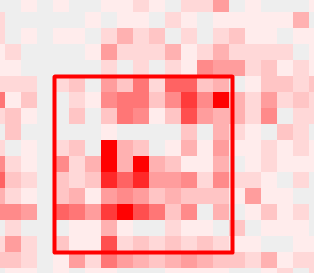

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 4, 2

In [18]:
# arr = c.matrix(balance=False)[924:937, 193:204]  
# arr = c.matrix(balance=False)[193:204, 924:937]  #указываем у, потом х
arr = c.matrix(balance=False)[194:205, 926:938] 

arr

array([[ 2,  3,  0,  5,  3,  7,  2,  8,  8,  3,  4,  0],
       [ 0,  2,  1,  6,  7,  7,  3,  6, 10,  6, 14,  4],
       [ 0,  3,  0,  3,  7,  6,  1,  3,  9,  5,  4,  4],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  3,  0,  4,  2],
       [ 2,  3,  0, 13,  4,  3,  0,  1,  4,  1,  5,  1],
       [ 6,  2,  4, 13,  4, 14,  4,  3,  1,  1,  4,  0],
       [ 3,  2,  3, 11,  8, 11,  5,  5,  6,  2,  6,  2],
       [ 3,  4,  1,  5,  6,  5,  3,  4,  3,  3,  3,  1],
       [ 8,  7,  5, 10, 15,  9,  7,  3,  6,  0,  4,  0],
       [ 0,  1,  1,  4,  1,  0,  0,  2,  1,  1,  0,  3],
       [ 3,  1,  1,  9,  2,  3,  2,  3,  2,  3,  2,  1]], dtype=int32)

In [651]:
arr_try = arr[:5]
arr_try

array([[ 2, 12, 11,  7,  8],
       [ 3, 14, 27, 10, 17],
       [ 5, 11, 16, 10,  7],
       [ 7, 26, 20,  7, 20],
       [18, 23, 28, 15, 16]], dtype=int32)

In [652]:
arr_try.diagonal()

array([ 2, 14, 16,  7, 16], dtype=int32)

In [660]:
arr_try2 = arr_try[:-1, 1:]
arr_try2.diagonal()

array([12, 27, 10, 20], dtype=int32)

In [19]:
arrhex = chex.matrix(balance=False)[194:205, 926:938] 

In [20]:
arrhex

array([[ 2,  4,  0,  5,  3,  8,  2,  5,  2,  5,  4,  0],
       [ 3,  1,  2,  7,  7,  2,  2,  5,  4,  7,  6, 10],
       [ 2,  1,  3,  4,  3,  7,  6,  4,  8,  4,  5,  1],
       [ 0,  0,  0,  2,  1,  0,  1,  3,  0,  1,  0,  1],
       [ 3,  0,  0, 15,  3,  3,  2,  5,  5,  5,  1,  0],
       [ 2,  2,  2,  9,  9,  6,  4,  5,  6,  4,  2,  3],
       [ 1,  5,  7,  6,  3, 12,  7,  6,  5,  2,  5,  2],
       [ 0,  3,  3, 10,  2,  2,  1,  1,  2,  0,  1,  1],
       [ 5,  7,  2,  9,  9,  9,  1,  7,  6,  2,  3,  2],
       [ 0,  0,  0,  2,  1,  3,  1,  0,  0,  0,  1,  2],
       [ 1,  3,  1,  8,  6,  4,  2,  5,  2,  1,  5,  1]], dtype=int32)

In [51]:
#Random array to estimate noise

arr_noi = c.matrix(balance=False)[118:128, 973:993] 
arr_noi


array([[2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [73]:

arr_b_noi = c.matrix(balance=True)[118:128, 973:993]
arr_b_noi
# np.max(arr_b_noi)

array([[0.0025411 , 0.        , 0.        , 0.        , 0.        ,
        0.0035081 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00222794, 0.        , 0.00387725],
       [0.        , 0.        , 0.        , 0.        , 0.00248982,
        0.00346046, 0.        , 0.00148117, 0.        , 0.00607802,
        0.        , 0.00253553, 0.00169954, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00246497, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00143773, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00210453, 0.        ,
        0.        , 0.00246857, 0.        , 0.        , 0.        ],
       [0.        , 0.00219932, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00128279, 0.        , 0.        ,
        0.        , 0.        , 0.00147191, 0

## Plot noise

In [670]:
def plot_box(array):
    series_1d = pd.Series(array.reshape(-1).tolist())
    lcr12 = pd.DataFrame(series_1d.values.tolist())
    sns.boxplot(data=lcr12.loc[:, 0]);
    

In [669]:
def plot_hist(array):
    series_1d = pd.Series(array.reshape([np.size(array), 1]).tolist())
    lcr12 = pd.DataFrame(series_1d.values.tolist())
    sns.histplot(lcr12[0], binwidth=0.00025);
#     sns.boxplot(data=lcr12.loc[:, 0]);

In [110]:
plot_hist()

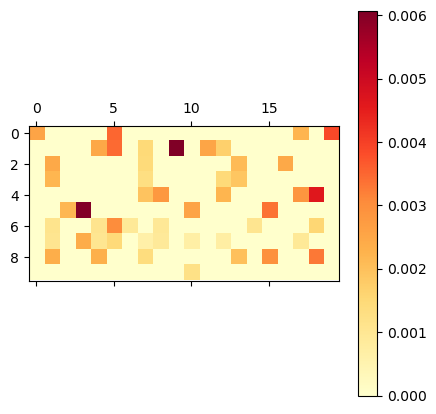

In [74]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
im = ax.matshow(arr_b_noi, cmap='YlOrRd')
# np.log10
fig.colorbar(im)

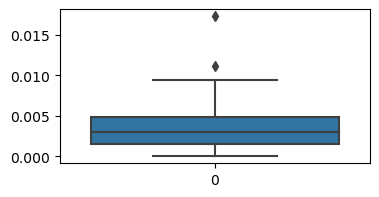

In [47]:
plot_box(arr_b)

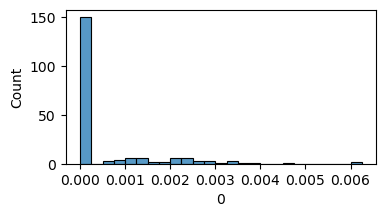

In [112]:
plot_hist(arr_b_noi)

In [270]:
# arr_b = c.matrix(balance=True)[194:205, 926:938]
# arr_b
# arr_b_hex = chex.matrix(balance=True)[194:205, 926:938]
# arr_b_hex

In [60]:
np.size(arr_b)

132

In [75]:
series = pd.Series(arr_b.tolist())
pd.DataFrame(series.values.tolist(), index=series.index)
series_1d = pd.Series(arr_b.reshape([np.size(arr_b), 1]).tolist())
# pd.DataFrame(series_1d.values.tolist(), index=series_1d.index)
lcr12 = pd.DataFrame(series_1d.values.tolist())
lcr12

0
0    0.002597
1    0.003113
2    0.000000
3    0.001858
4    0.001363
..        ...
127  0.003078
128  0.001900
129  0.003346
130  0.001852
131  0.001579

[132 rows x 1 columns]

<Axes: >

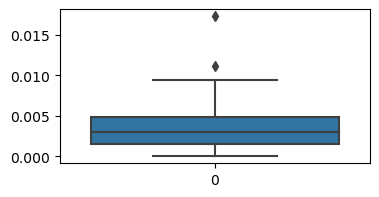

In [105]:
sns.boxplot(data=lcr12.loc[:, 0])

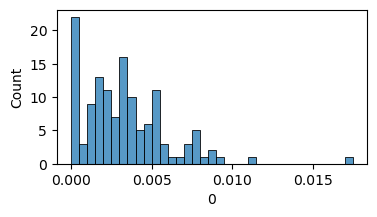

In [106]:
sns.histplot(lcr12[0], binwidth=0.0005);

In [24]:
#filter zeros
arr_b_nz = arr_b[np.where(arr_b!=0)]
series_nz_1d = pd.Series(arr_b_nz.reshape(-1).tolist())
arr_b_hex_nz = arr_b_hex[np.where(arr_b!=0)]
series_nz_hex_1d = pd.Series(arr_b_hex_nz.reshape(-1).tolist())
lcrnz = pd.DataFrame(series_nz_1d.values.tolist())

In [42]:

lcrnz.head()
print(lcrnz.shape)

(110, 1)


In [40]:
lcrnz_hex = pd.DataFrame(series_nz_hex_1d.values.tolist())
lcrnz_hex.head()

0
0  0.002343
1  0.004436
2  0.001974
3  0.001455
4  0.004165

In [43]:
print(lcrnz_hex.shape)

(110, 1)


<Axes: >

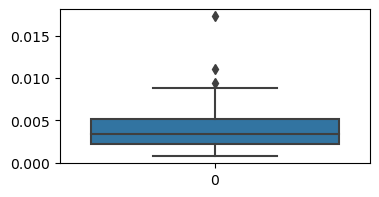

In [30]:
sns.boxplot(data=lcrnz.loc[:, 0])

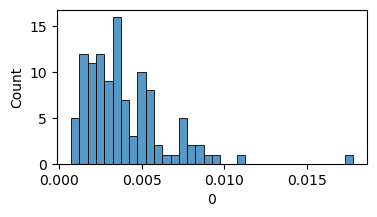

In [31]:
sns.histplot(lcrnz[0], binwidth=0.0005);

<Axes: >

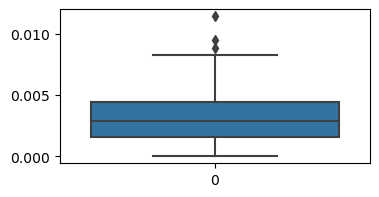

In [26]:
sns.boxplot(data=lcrnz_hex.loc[:, 0])

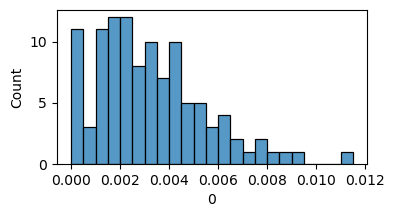

In [27]:
sns.histplot(lcrnz_hex[0], binwidth=0.0005);

In [44]:
print(f"median control and median hex: {np.median(lcrnz)}, {np.median(lcrnz_hex)}")

median control and median hex: 0.003433070248300828, 0.0028597669611328666


In [592]:
from scipy.stats import mannwhitneyu

In [593]:
U1, p = mannwhitneyu(lcrnz, lcrnz_hex, nan_policy='omit')
# , method="exact"
print(U1, p)

[7102.] [0.02590693]


In [101]:
print(f"min and max values: {np.min(lcrnz)}, {np.max(lcrnz)}")

min and max values: 0.0007478316548225659, 0.017288100361261577


In [113]:
Q1 = lcrnz[0].quantile(0.25)
Q3 = lcrnz[0].quantile(0.75)
IQR = Q3 - Q1
IQR
print(f"lower and upper quartiles: {Q1}, {Q3}")

lower and upper quartiles: 0.002232566471503828, 0.005121562289309881


### 2 kb

### 1. Downsample & balance

In [49]:
dirpath = "/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/2kb_res/"
files = ["I-CTRL", "II-CTRL", "I-HEX", "II-HEX"]
for file in files:
    c = cooler.Cooler(dirpath+file+"_reg12_2000hg38.cool")
    print(file, c.info["sum"], "\n")

I-CTRL 712364 

II-CTRL 617915 

I-HEX 664243 

II-HEX 883788 



```
(hiclib38_env)
cooltools random-sample -c 617915 I-CTRL_reg12_2000hg38.cool subs_I-CTRL_reg12_2000hg38.cool
cooltools random-sample -c 617915 I-HEX_reg12_2000hg38.cool subs_I-HEX_reg12_2000hg38.cool
cooltools random-sample -c 617915 II-HEX_reg12_2000hg38.cool subs_II-HEX_reg12_2000hg38.cool

for file in *.cool; do cooler balance $file; done  #не писать, если есть в скрипте уже
bash cool_process.sh
```

In [218]:
def get_loop_df(y1, y2, x1, x2, df=pd.DataFrame(), lognorm=False, files=[]):
    df = pd.DataFrame()
    i=0
    for file in files:
        array_b = file.matrix(balance=True)[y1:y2, x1:x2] 
        array_b_filt = np.where(array_b==0, np.nan, array_b)
        if lognorm:
            array_b_filt = np.log10(array_b_filt)
        series_1d = pd.Series(array_b_filt.reshape(-1).tolist())
        df[i] = series_1d.values.tolist()
        i+=1
    return df

In [321]:
def get_loop_one_df(loop_num, loop_coord=[], df=pd.DataFrame(), lognorm=False, files=[]):
    df = pd.DataFrame()
    df['loop'] = "loop"
    i=1
    for file in files:
        y1, y2, x1, x2 = loop_coord
        array_b = file.matrix(balance=True)[y1:y2, x1:x2] 
        array_b_filt = np.where(array_b==0, np.nan, array_b)
        if lognorm:
            array_b_filt = np.log10(array_b_filt)
        series_1d = pd.Series(array_b_filt.reshape(-1).tolist())
        df[i] = series_1d.values.tolist()
        i+=1
    df['loop'] = loop_num
    return df

In [134]:
def plot_heatmap(array, log_scale=False):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    im = ax.matshow(array, cmap='YlOrRd')
    if log_scale:
        im = ax.matshow(np.log10(array), cmap='YlOrRd')       
    fig.colorbar(im)

In [110]:
c2k = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/2kb_res/downs/subs_I-CTRL_reg12_2000hg38.cool')
c2k2 = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/2kb_res/downs/II-CTRL_reg12_2000hg38.cool')

c2hex = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/2kb_res/downs/subs_I-HEX_reg12_2000hg38.cool')
c2hex2 = cooler.Cooler('/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/2kb_res/downs/subs_II-HEX_reg12_2000hg38.cool')




/tmp/ipykernel_22474/801870538.py:6: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(array), cmap='YlOrRd')


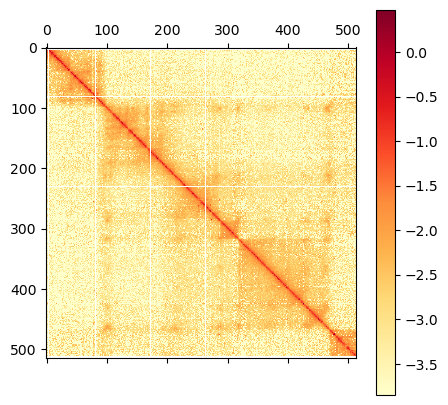

In [678]:
plot_heatmap(array_c2k2, log_scale=True)

## Диагонали (на 2kb)

In [687]:
array_c2k = c2k.matrix(balance=True)[:, :]  
array_c2k2 = c2k2.matrix(balance=True)[:, :]  
array_c2hex = c2hex.matrix(balance=True)[:, :] 
array_c2hex2 = c2hex2.matrix(balance=True)[:, :] 
arrays = [array_c2k, array_c2k2, array_c2hex, array_c2hex2]

In [734]:
def boxplot_diag(arrays=arrays, diag_num=0):  # main diag - 0, first - 1, second - 2
    f, axes = plt.subplots(1,4, figsize=(20,10))
    titles = ['CI','CII','HI','HII']
    arrays_new=[]
    if diag_num == 0:
        arrays_new = arrays
    else:
        for array in arrays:
            array = array[:-diag_num, diag_num:]
            arrays_new.append(array)
    for i, array_new in enumerate(arrays_new):
        g = sns.boxplot(data=array_new.diagonal(), ax=axes[i])
        axes[i].set_title(titles[i], size=18) 
    f.suptitle(f"Diag {diag_num}", size=25)
    plt.tight_layout()

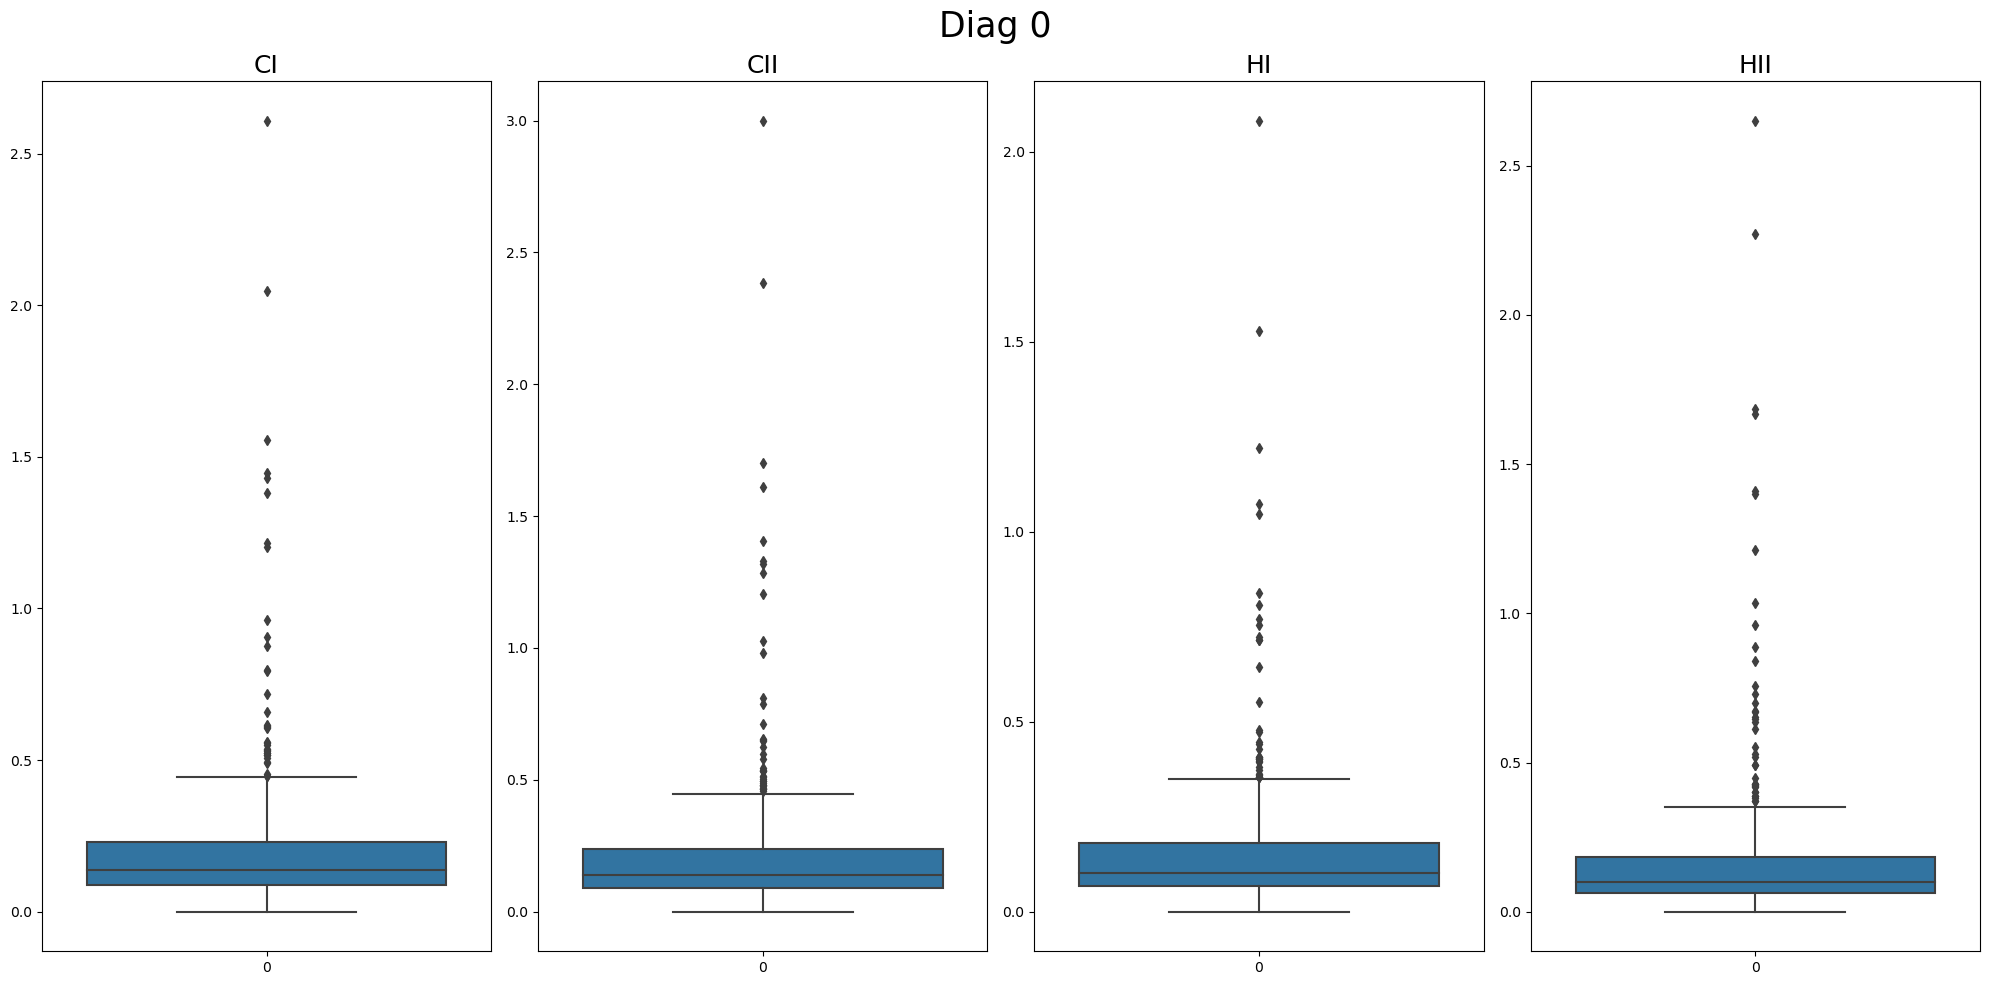

In [733]:
boxplot_diag(arrays=arrays, diag_num=0)

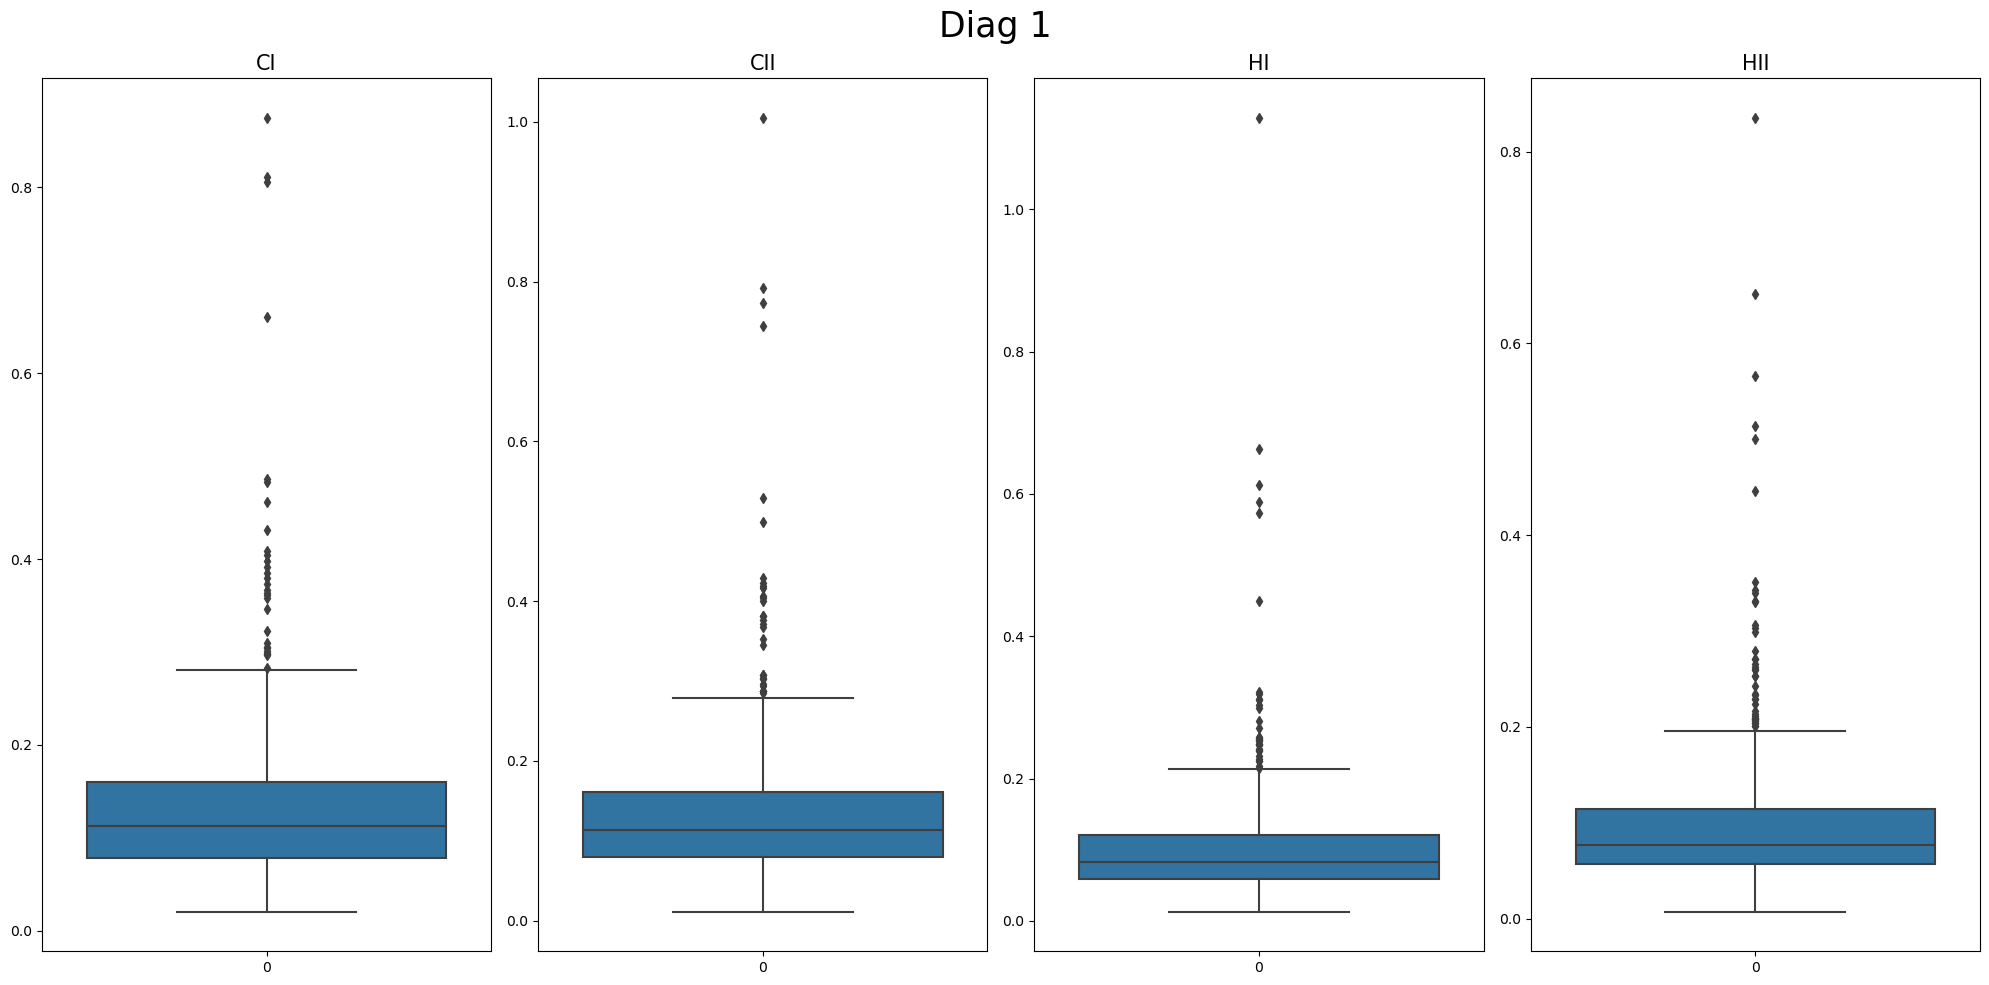

In [730]:
boxplot_diag(arrays=arrays, diag_num=1)

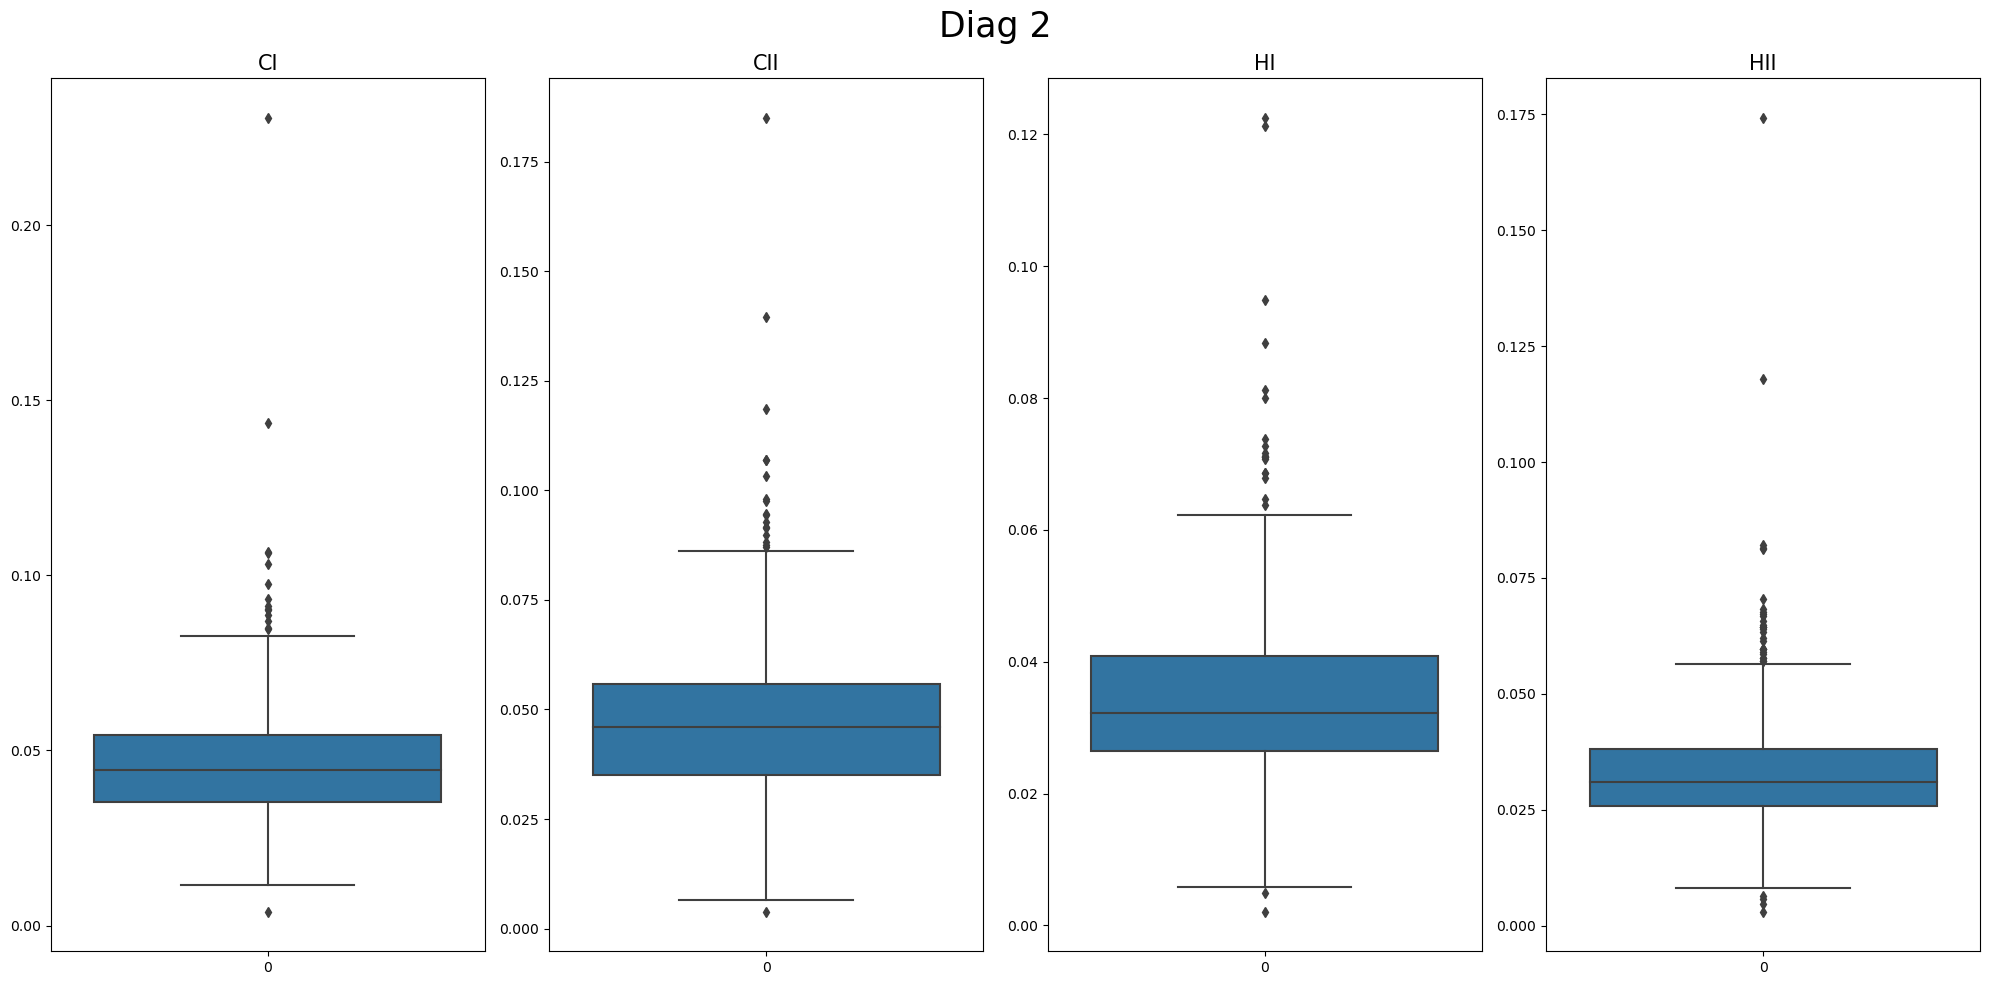

In [731]:
boxplot_diag(arrays=arrays, diag_num=2)

### 2. Выбрали область для LCR1-LCR2


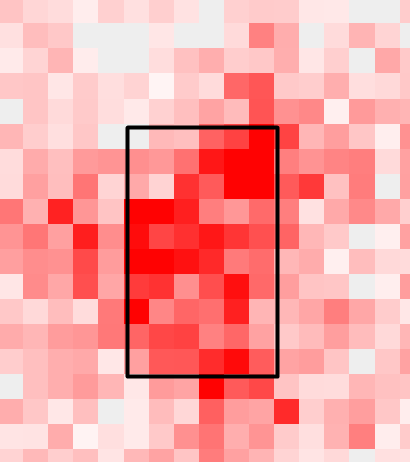

Записать значения (пока не log) в таблицу

In [323]:
df_exp1 = get_loop_one_df(10, loop10, lognorm=False, files=[c2k, c2k2, c2hex, c2hex2])

In [324]:
df_exp1.head()

loop         1         2         3         4
0    10       NaN  0.002752       NaN  0.001427
1    10  0.002416  0.003241  0.001595  0.004298
2    10  0.002140  0.003188  0.003750  0.003259
3    10  0.005428  0.004249  0.002452  0.003558
4    10  0.005988  0.004593  0.006621  0.003445

/tmp/ipykernel_22474/801870538.py:6: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(array), cmap='YlOrRd')


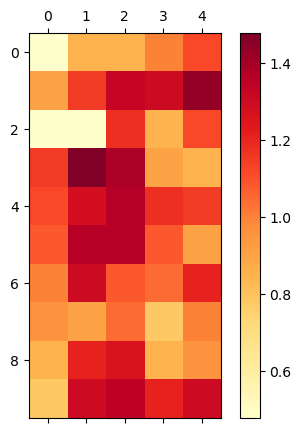

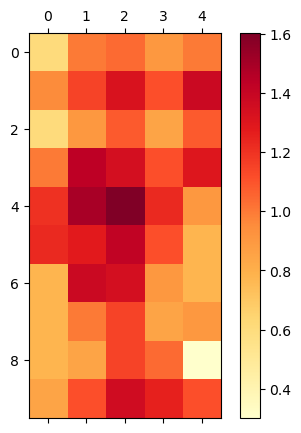

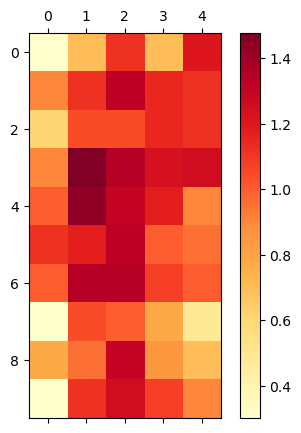

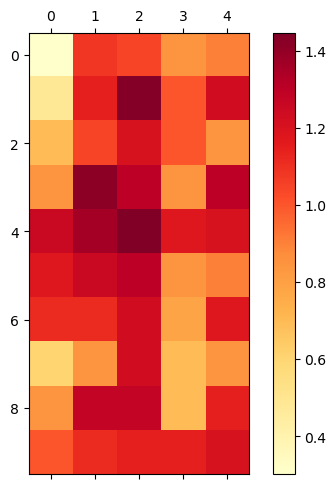

In [325]:
cfiles = [c2k, c2k2, c2hex, c2hex2]
for i in range(4):
    arr = cfiles[i].matrix(balance=False)[96:106, 463:468] 
    plot_heatmap(arr, log_scale=True)
plt.tight_layout()
plt.show()

### 3. Выбираем петли

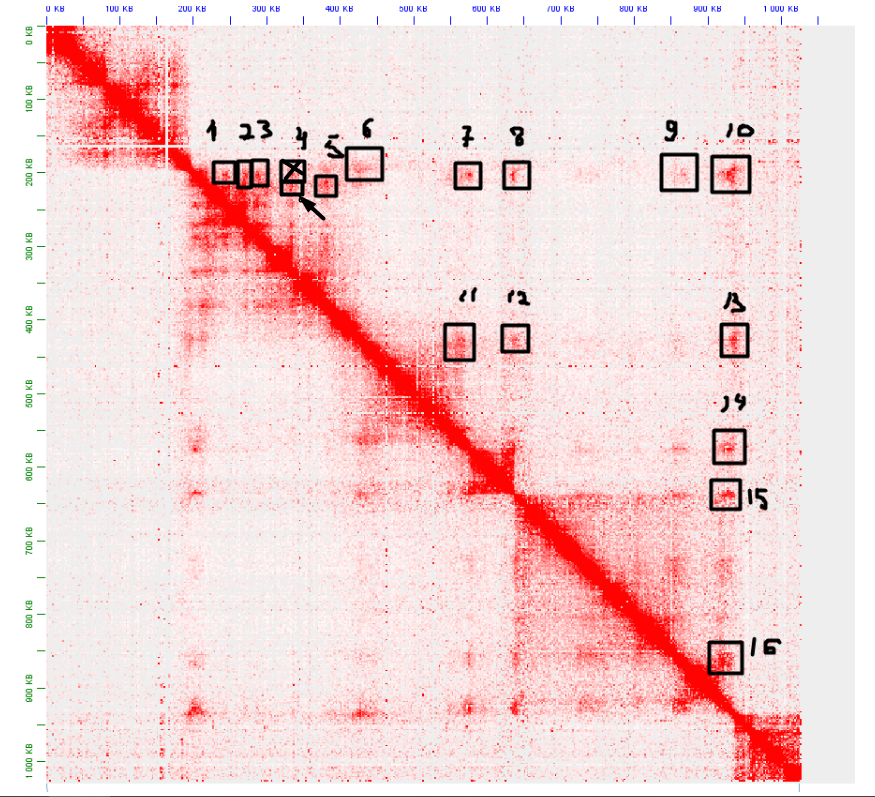

7 - krt5-lcr1

14 - krt5-lcr2

10 - lcr1-lcr2

In [244]:
def find_loop():
    y, x, y_shape, x_shape, num = [int(x) for x in input("Enter y, x, y_shape, x_shape, num: ").split()] 
    print(f"y1_{num}, y2_{num}, x1_{num}, x2_{num} = {y // 2}, {y // 2 + y_shape}, {x // 2}, {x // 2 + x_shape}")
    a, b, c, d = y // 2, y // 2 + y_shape, x // 2, x // 2 + x_shape
    arr = c2k.matrix(balance=False)[a:b, c:d] 
    plot_heatmap(arr, log_scale=True);

### Loop portraits

#### 1 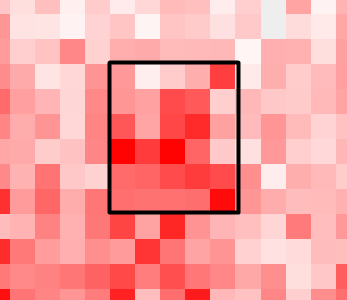 

#### 2  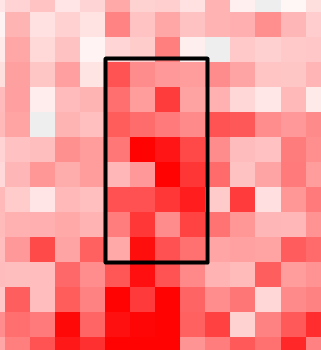

#### 3 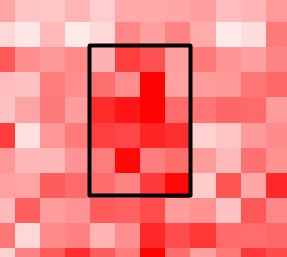

#### 4 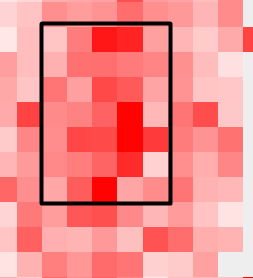

#### 5 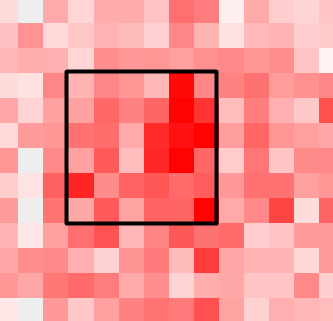

#### 6 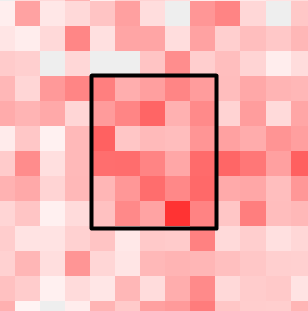

#### 7 (krt5-lcr1) 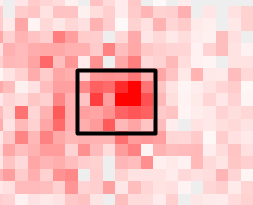

#### 8 e-lcr1 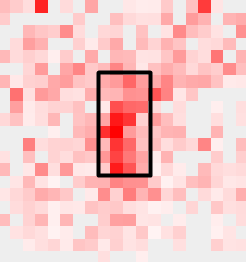

#### 9 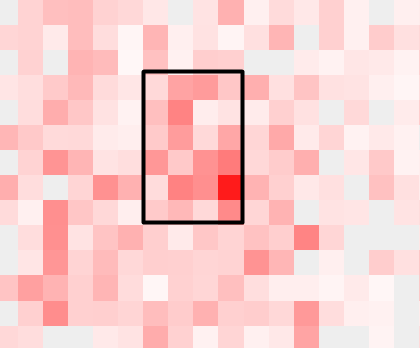

#### 10 lcr1-lcr2 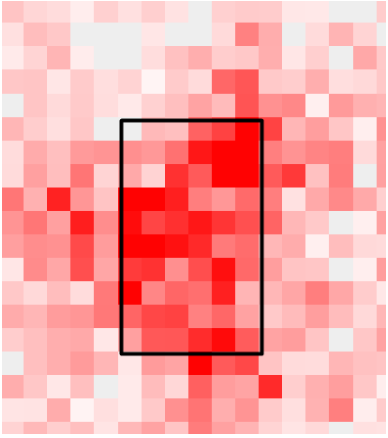

#### 11 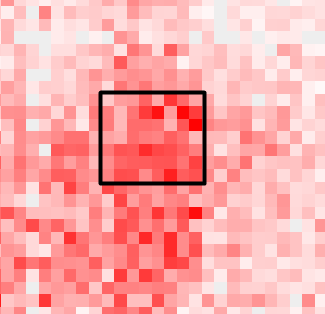

#### 12 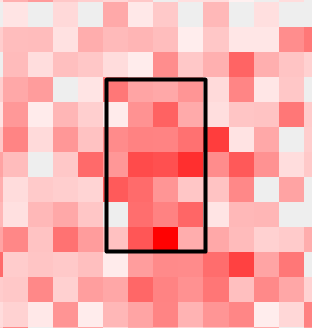

#### 13 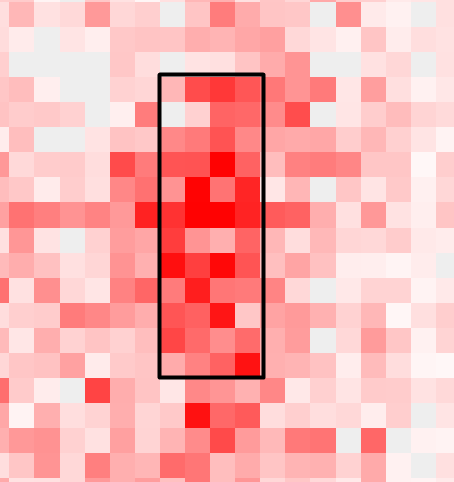

#### 14 krt5-lcr2 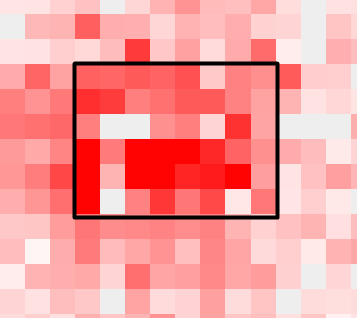

#### 15 lcr2-e 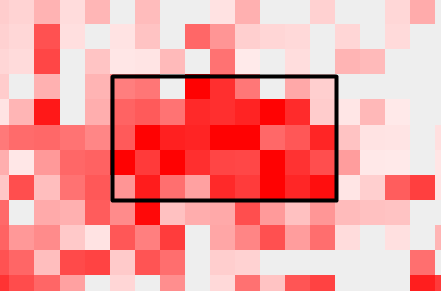

#### 16 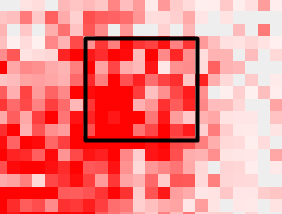

Enter y, x, y_shape, x_shape, num: 852 916 8 9 16
y1_16, y2_16, x1_16, x2_16 = 426, 434, 458, 467


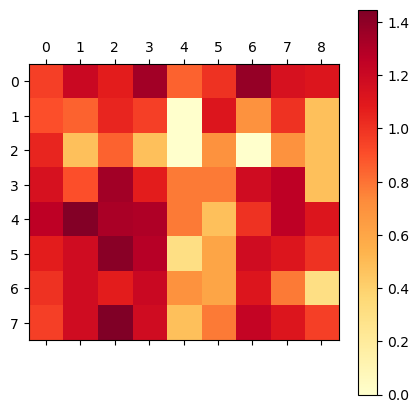

In [258]:
find_loop()

### Координаты петель в cool файле

In [259]:
y1_1, y2_1, x1_1, x2_1 = 98, 104, 120, 125
y1_2, y2_2, x1_2, x2_2 = 97, 105, 133, 137
y1_3, y2_3, x1_3, x2_3 = 99, 105, 142, 146
y1_4, y2_4, x1_4, x2_4 = 105, 112, 164, 169
y1_5, y2_5, x1_5, x2_5 = 104, 110, 186, 192
y1_6, y2_6, x1_6, x2_6 = 94, 100, 209, 214
y1_7, y2_7, x1_7, x2_7 = 99, 104, 284, 290           # krt5-lcr1
y1_8, y2_8, x1_8, x2_8 = 97, 105, 316, 320          # e-lcr1
y1_9, y2_9, x1_9, x2_9 = 97, 103, 431, 435
y1_10, y2_10, x1_10, x2_10 = 96, 106, 463, 468      # lcr1-lcr2
y1_11, y2_11, x1_11, x2_11 = 212, 219, 277, 285
y1_12, y2_12, x1_12, x2_12 = 210, 217, 316, 320
y1_13, y2_13, x1_13, x2_13 = 208, 220, 466, 470
y1_14, y2_14, x1_14, x2_14 = 284, 290, 461, 469           # krt5-lcr2
y1_15, y2_15, x1_15, x2_15 = 316, 321, 460, 469           # e-lcr2
y1_16, y2_16, x1_16, x2_16 = 426, 434, 458, 467

In [383]:
loops = {1: [98, 104, 120, 125], 2 : [97, 105, 133, 137], 3 : [99, 105, 142, 146], 4 : [105, 112, 164, 169], \
         5 : [104, 110, 186, 192], 6 : [94, 100, 209, 214], 7 : [99, 104, 284, 290], 8 : [97, 105, 316, 320], \
        9 : [97, 103, 431, 435], 10 : [96, 106, 463, 468], 11 : [212, 219, 277, 285], 12 : [210, 217, 316, 320], \
        13 : [208, 220, 466, 470], 14 : [284, 290, 461, 469], 15 : [316, 321, 460, 469], 16 : [426, 434, 458, 467]}

## ? нормировка на размер петли

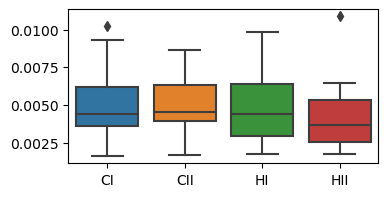

In [266]:
g = sns.boxplot(data=df_krt5_lcr1)
g.set_xticklabels(['CI','CII','HI','HII']);

In [268]:
# log-normed
df_krt5_lcr1_log = get_loop_df(99, 104, 284, 290, lognorm=True, files=[c2k, c2k2, c2hex, c2hex2])
df_krt5_lcr1_log.shape

(30, 4)

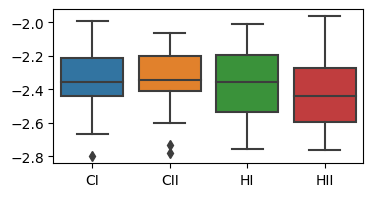

In [269]:
g = sns.boxplot(data=df_krt5_lcr1_log)
g.set_xticklabels(['CI','CII','HI','HII']);

In [386]:
#one df
df = pd.DataFrame(columns=['loop', 1, 2, 3, 4])
for i, j in loops.items():
    df_exp1 = get_loop_one_df(i, j, lognorm=False, files=[c2k, c2k2, c2hex, c2hex2])
    df = pd.concat([df, df_exp1])

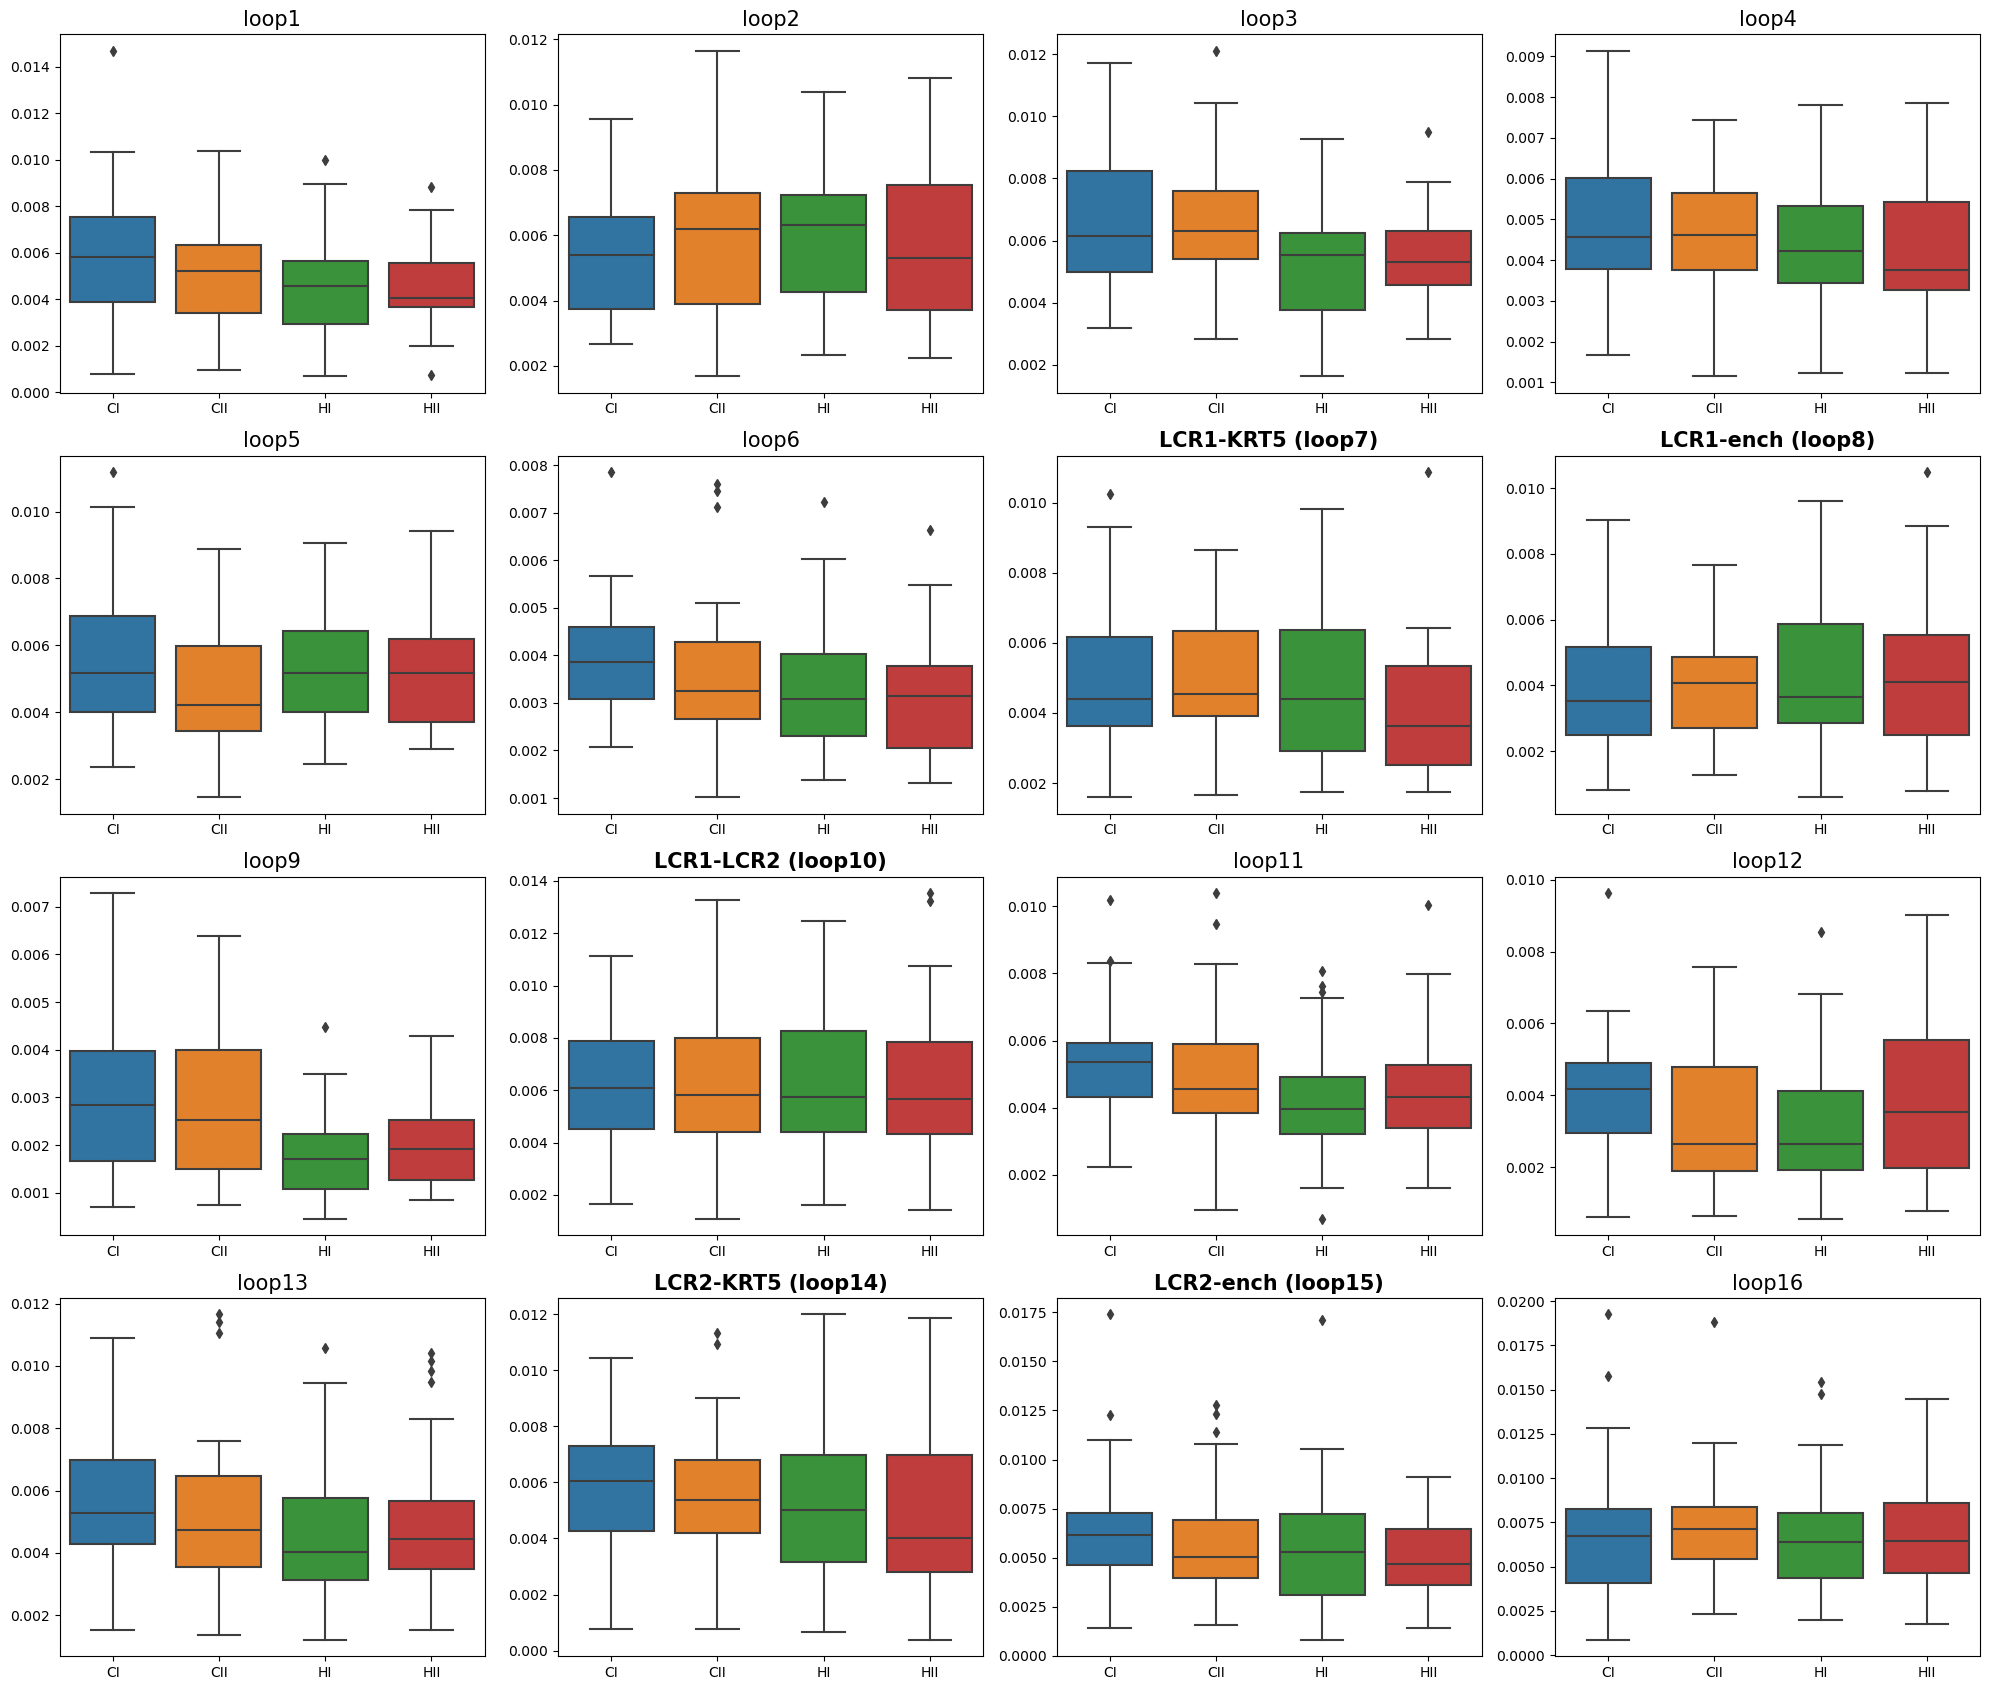

In [422]:
f, axes = plt.subplots(4,4, figsize=(20,17))
for i in range(16):
    
    g = sns.boxplot(data=df.loc[df['loop'] == i+1].iloc[:, [1, 2, 3, 4]], ax=axes[i//4, i%4])
    g.set_xticklabels(['CI','CII','HI','HII']);
    if i==9:
        axes[i//4, i%4].set_title(f'LCR1-LCR2 (loop{i + 1})', size=15, fontweight="bold")
    elif i==6:
        axes[i//4, i%4].set_title(f'LCR1-KRT5 (loop{i + 1})', size=15, fontweight="bold")
    elif i==7:
        axes[i//4, i%4].set_title(f'LCR1-ench (loop{i + 1})', size=15, fontweight="bold")
    elif i==13:
        axes[i//4, i%4].set_title(f'LCR2-KRT5 (loop{i + 1})', size=15, fontweight="bold") 
    elif i==14:
        axes[i//4, i%4].set_title(f'LCR2-ench (loop{i + 1})', size=15, fontweight="bold") 
    else:
        axes[i//4, i%4].set_title(f'loop{i + 1}', size=15)
plt.tight_layout()

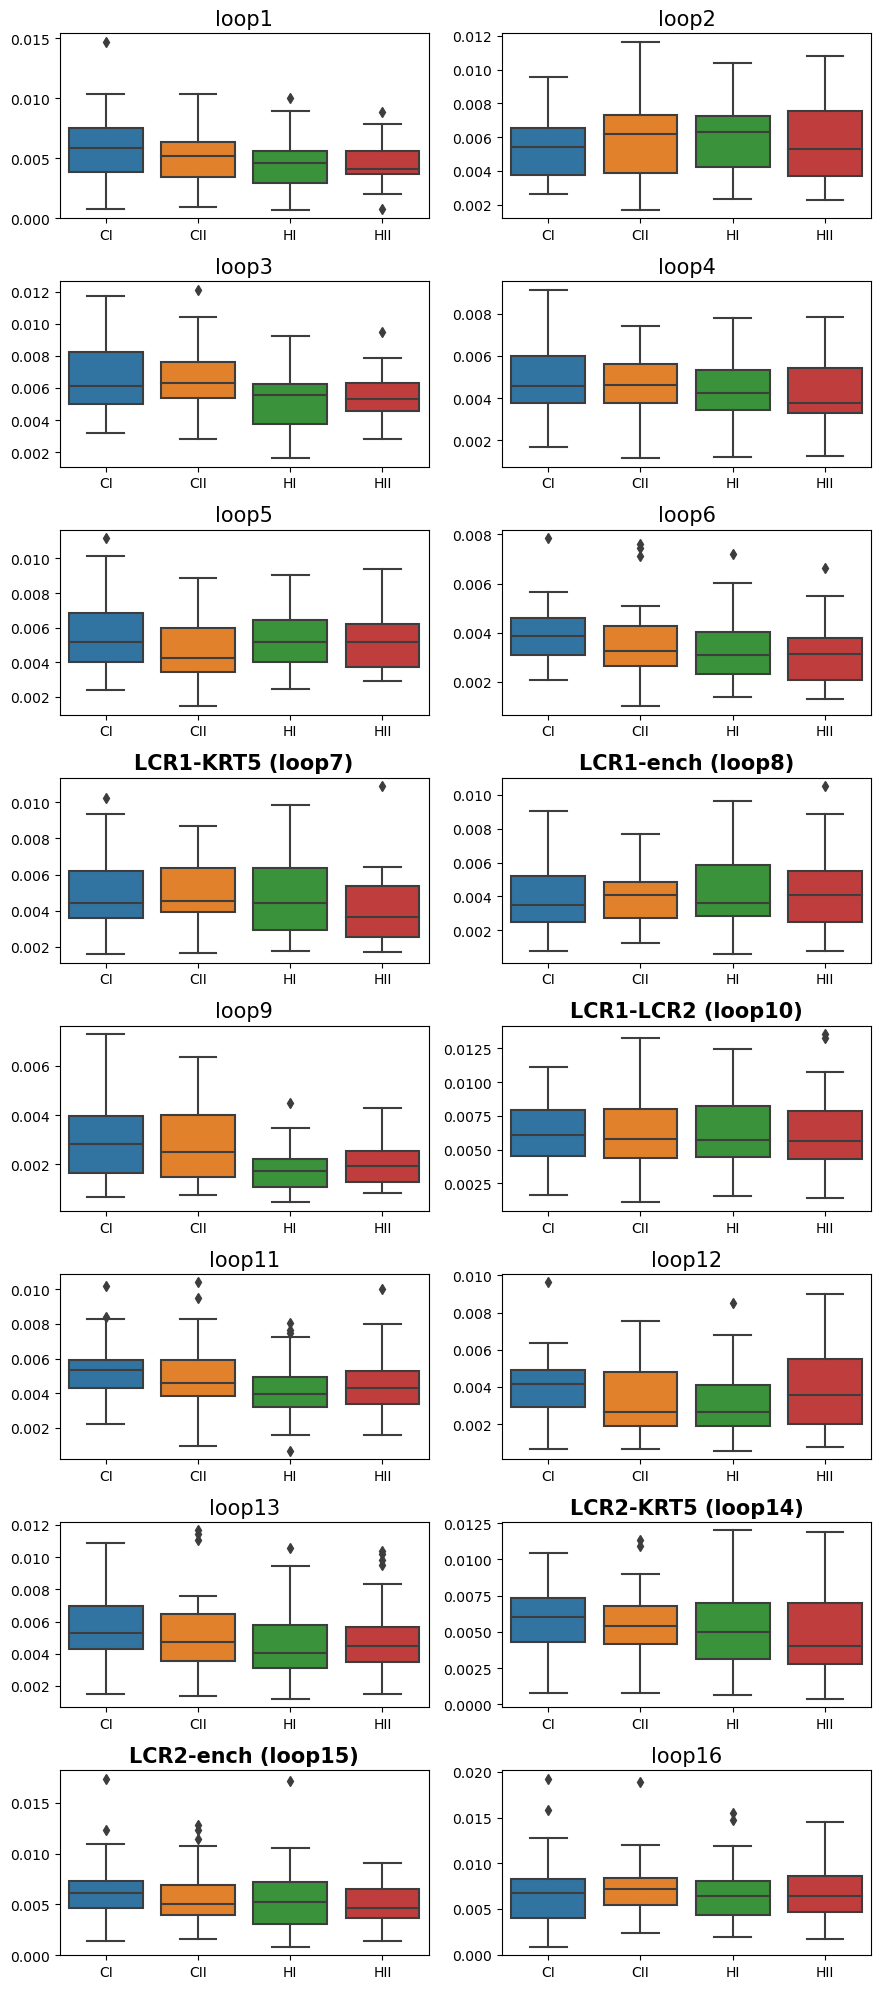

In [429]:
f, axes = plt.subplots(8,2, figsize=(9,20))
for i in range(16):
    
    g = sns.boxplot(data=df.loc[df['loop'] == i+1].iloc[:, [1, 2, 3, 4]], ax=axes[i//2, i%2])
    g.set_xticklabels(['CI','CII','HI','HII']);
    if i==9:
        axes[i//2, i%2].set_title(f'LCR1-LCR2 (loop{i + 1})', size=15, fontweight="bold")
    elif i==6:
        axes[i//2, i%2].set_title(f'LCR1-KRT5 (loop{i + 1})', size=15, fontweight="bold")
    elif i==7:
        axes[i//2, i%2].set_title(f'LCR1-ench (loop{i + 1})', size=15, fontweight="bold")
    elif i==13:
        axes[i//2, i%2].set_title(f'LCR2-KRT5 (loop{i + 1})', size=15, fontweight="bold") 
    elif i==14:
        axes[i//2, i%2].set_title(f'LCR2-ench (loop{i + 1})', size=15, fontweight="bold") 
    else:
        axes[i//2, i%2].set_title(f'loop{i + 1}', size=15)
# plt.suptitle('Loop intensity',
#              fontsize=18)
plt.tight_layout()
# plt.savefig('loops_box.pdf', dpi=300, format = "pdf")

### С логарифмированием

In [425]:
#one df
df_log = pd.DataFrame(columns=['loop', 1, 2, 3, 4])
for i, j in loops.items():
    df_exp2 = get_loop_one_df(i, j, lognorm=True, files=[c2k, c2k2, c2hex, c2hex2])
    df_log = pd.concat([df_log, df_exp2])

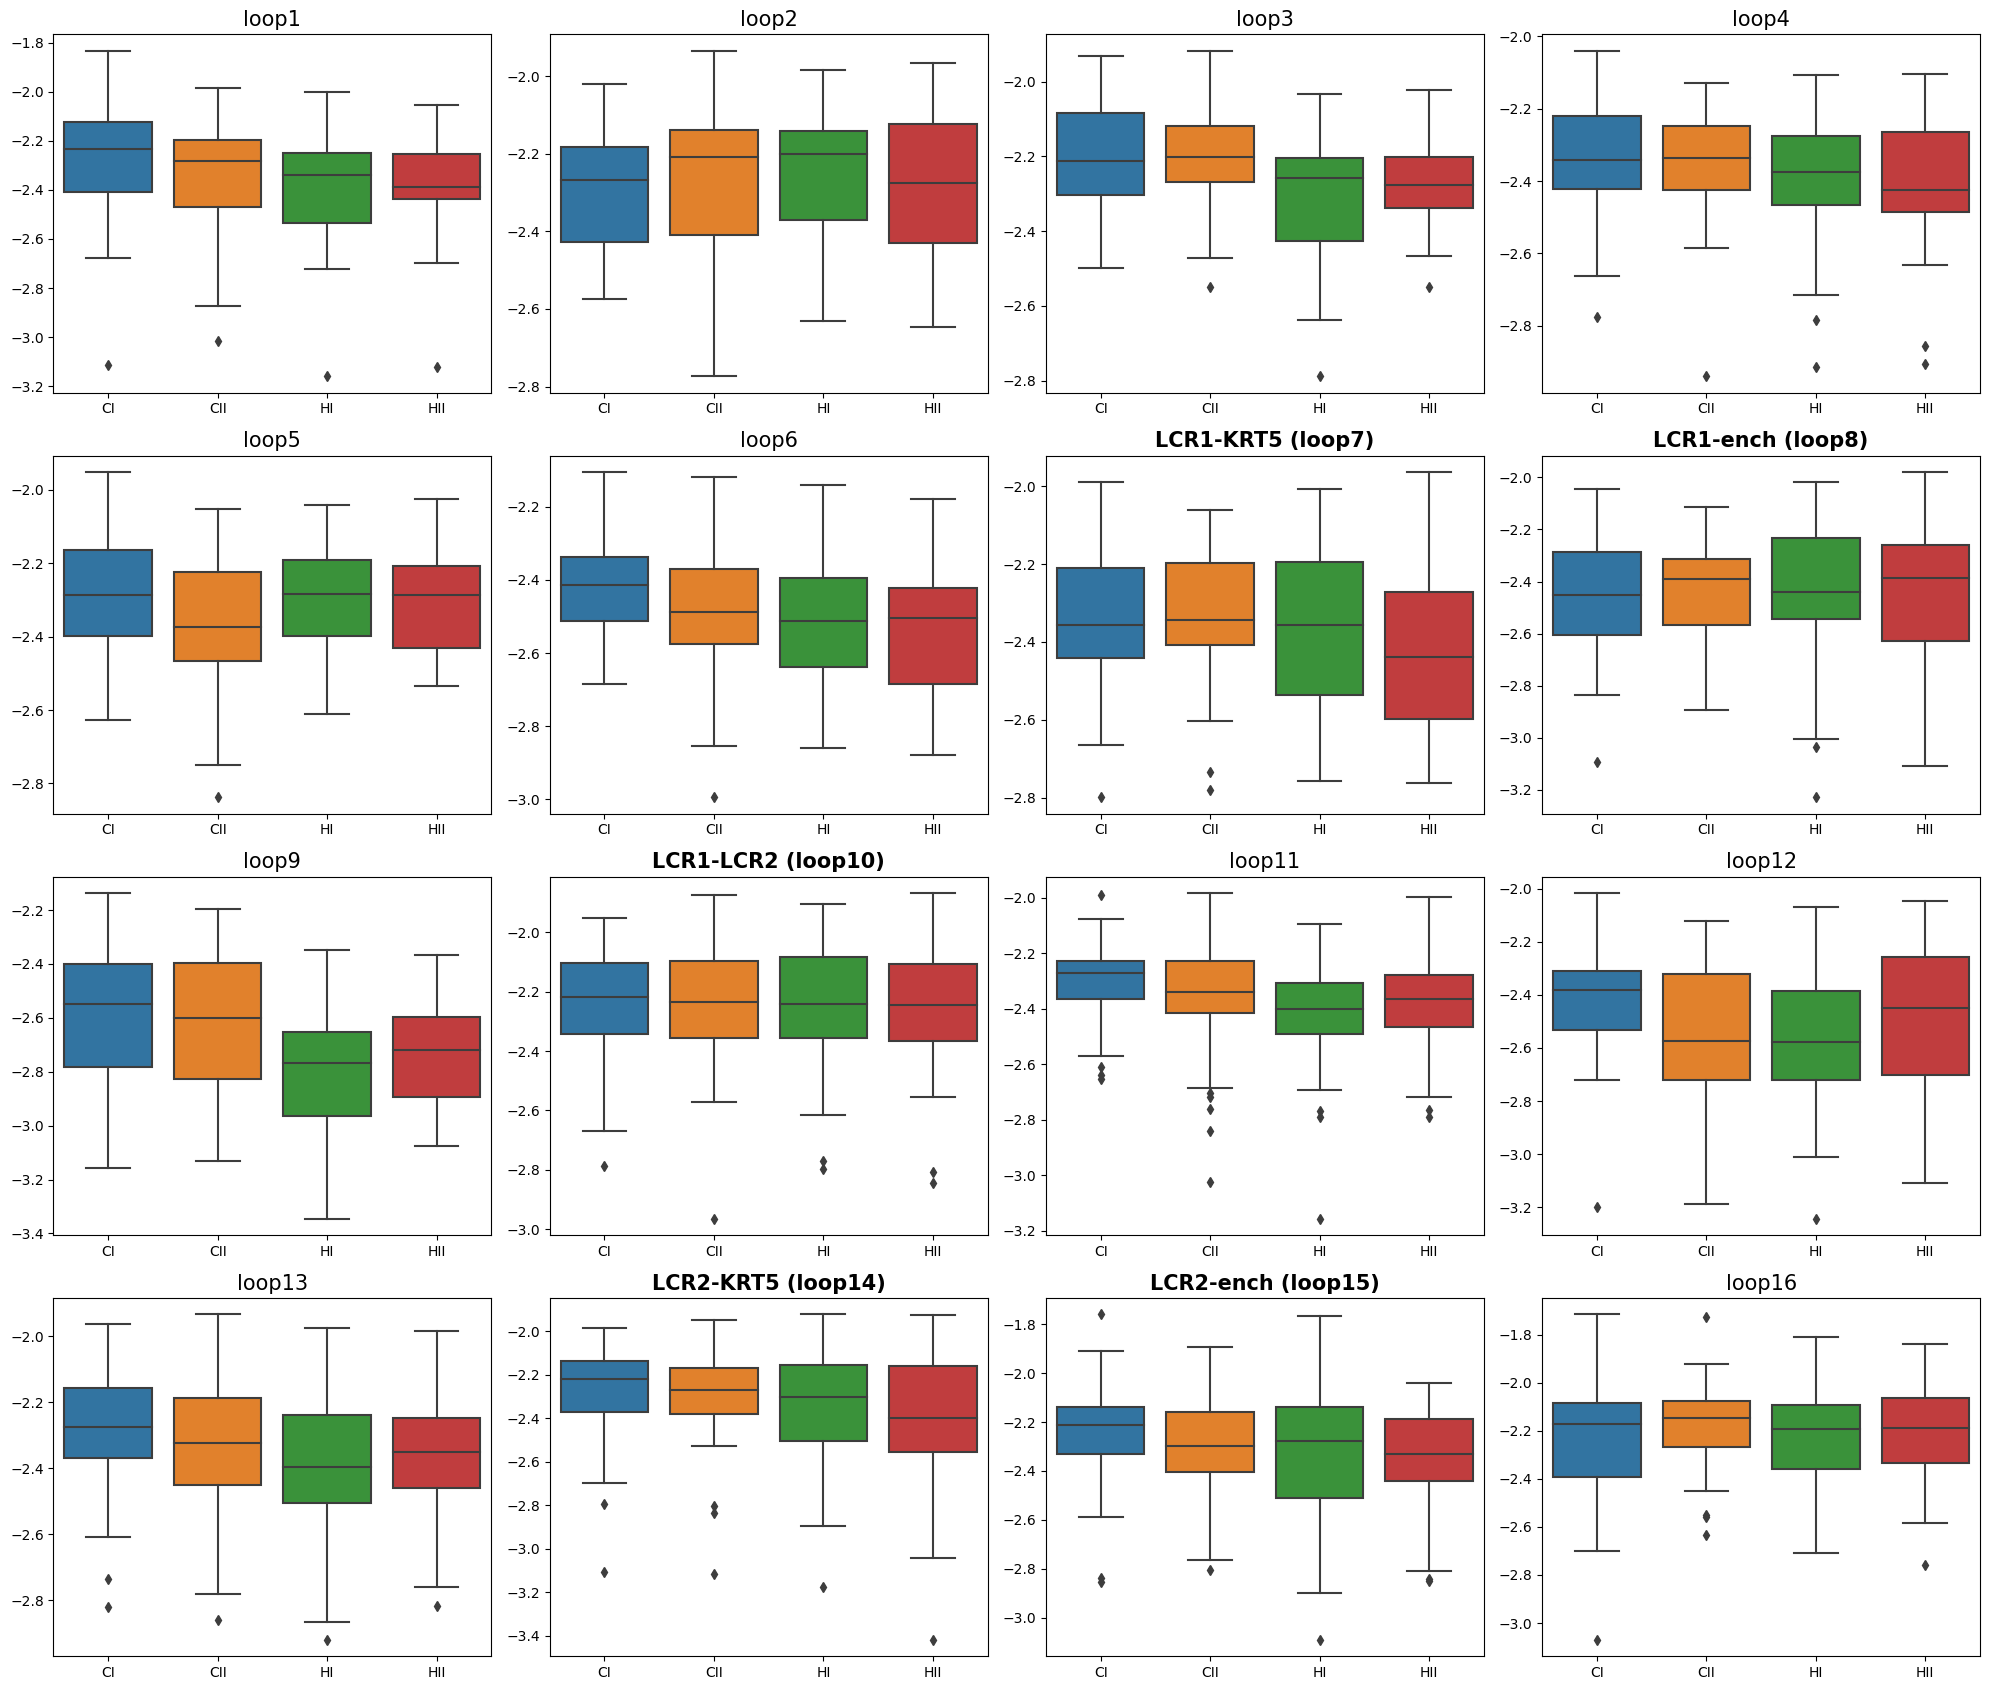

In [426]:
f, axes = plt.subplots(4,4, figsize=(20,17))
for i in range(16):
    
    g = sns.boxplot(data=df_log.loc[df_log['loop'] == i+1].iloc[:, [1, 2, 3, 4]], ax=axes[i//4, i%4])
    g.set_xticklabels(['CI','CII','HI','HII']);
    if i==9:
        axes[i//4, i%4].set_title(f'LCR1-LCR2 (loop{i + 1})', size=15, fontweight="bold")
    elif i==6:
        axes[i//4, i%4].set_title(f'LCR1-KRT5 (loop{i + 1})', size=15, fontweight="bold")
    elif i==7:
        axes[i//4, i%4].set_title(f'LCR1-ench (loop{i + 1})', size=15, fontweight="bold")
    elif i==13:
        axes[i//4, i%4].set_title(f'LCR2-KRT5 (loop{i + 1})', size=15, fontweight="bold") 
    elif i==14:
        axes[i//4, i%4].set_title(f'LCR2-ench (loop{i + 1})', size=15, fontweight="bold") 
    else:
        axes[i//4, i%4].set_title(f'loop{i + 1}', size=15)
plt.tight_layout()

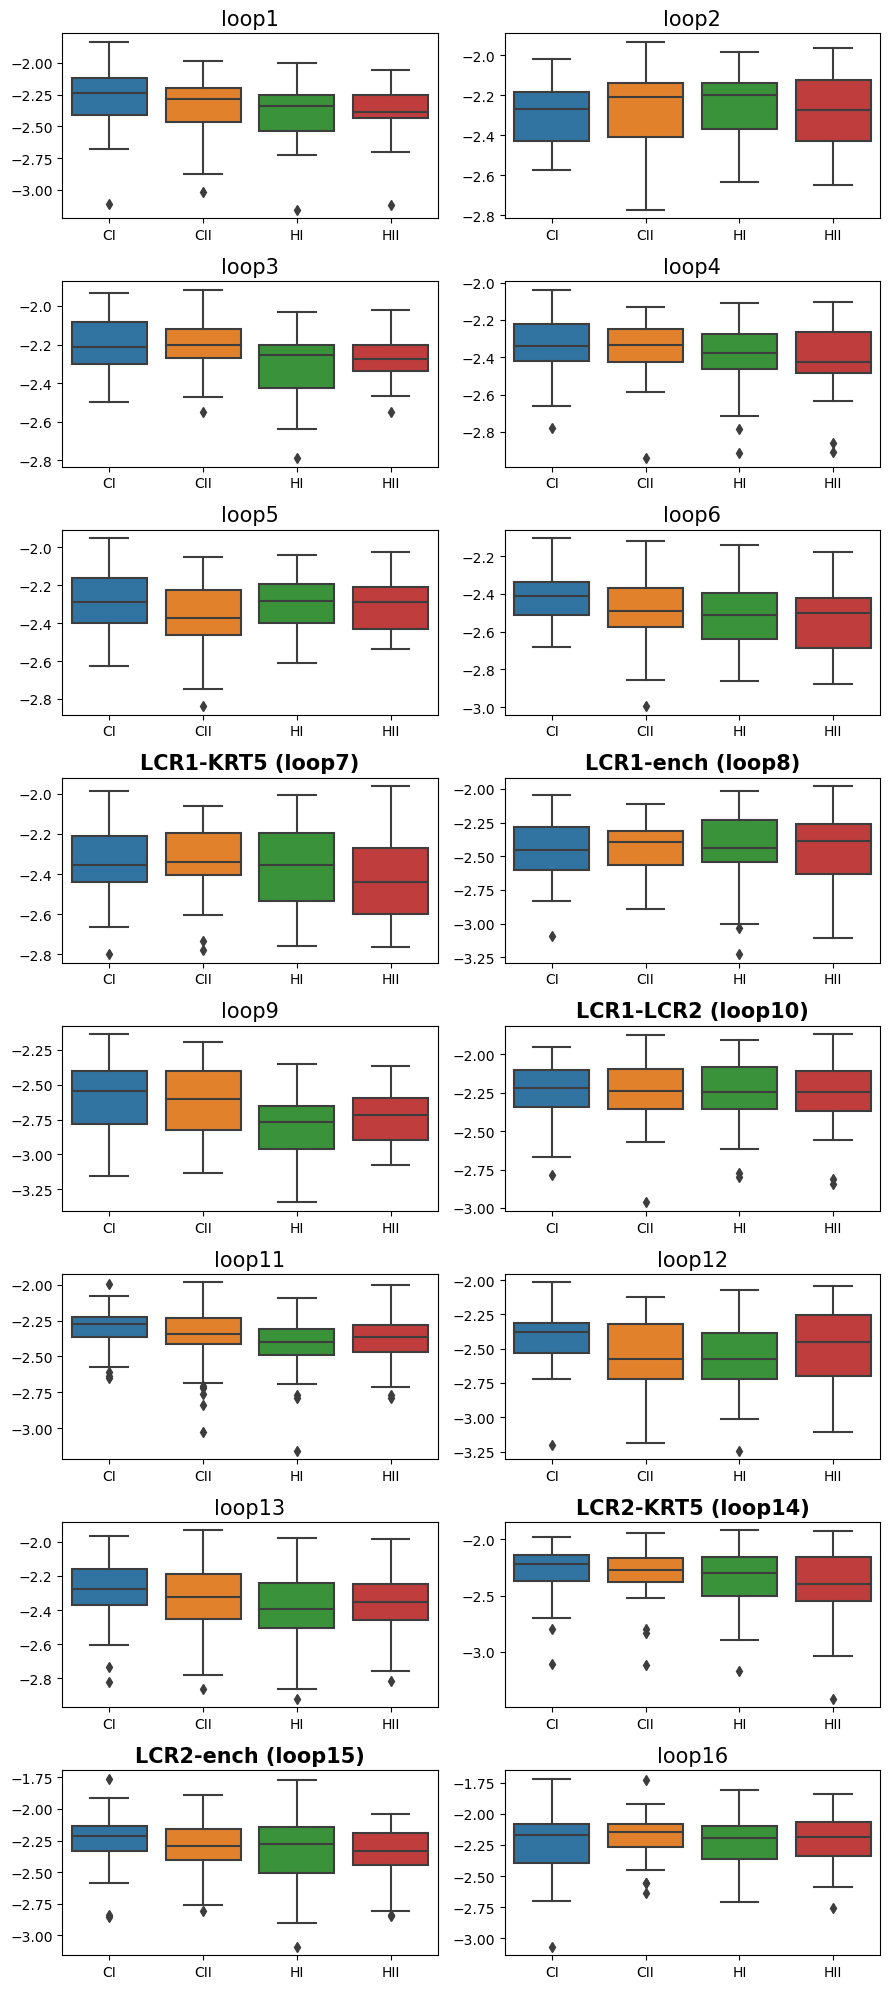

In [427]:
f, axes = plt.subplots(8,2, figsize=(9,20))
for i in range(16):
    
    g = sns.boxplot(data=df_log.loc[df_log['loop'] == i+1].iloc[:, [1, 2, 3, 4]], ax=axes[i//2, i%2])
    g.set_xticklabels(['CI','CII','HI','HII']);
    if i==9:
        axes[i//2, i%2].set_title(f'LCR1-LCR2 (loop{i + 1})', size=15, fontweight="bold")
    elif i==6:
        axes[i//2, i%2].set_title(f'LCR1-KRT5 (loop{i + 1})', size=15, fontweight="bold")
    elif i==7:
        axes[i//2, i%2].set_title(f'LCR1-ench (loop{i + 1})', size=15, fontweight="bold")
    elif i==13:
        axes[i//2, i%2].set_title(f'LCR2-KRT5 (loop{i + 1})', size=15, fontweight="bold") 
    elif i==14:
        axes[i//2, i%2].set_title(f'LCR2-ench (loop{i + 1})', size=15, fontweight="bold") 
    else:
        axes[i//2, i%2].set_title(f'loop{i + 1}', size=15)
# plt.suptitle('Loop intensity',
#              fontsize=18)
plt.tight_layout()

### Медианы для петель

In [449]:
# count median for each loop
loop_median_df = pd.DataFrame(columns=['loop', 'CI', 'CII', 'HI', 'HII'])
for i in range(16):
    l_med = df.loc[df['loop'] == i+1].median(axis=0)
    l_med_df = pd.DataFrame(l_med.values).transpose()
    l_med_df.columns=['loop', 'CI', 'CII', 'HI', 'HII']
    loop_median_df = pd.concat([loop_median_df, l_med_df])
    

In [450]:
loop_median_df

loop        CI       CII        HI       HII
0   1.0  0.005827  0.005221  0.004584  0.004077
0   2.0  0.005403  0.006194  0.006305  0.005303
0   3.0  0.006151    0.0063  0.005543  0.005295
0   4.0  0.004554  0.004605   0.00422  0.003756
0   5.0  0.005165  0.004224  0.005185  0.005173
0   6.0  0.003865  0.003244   0.00308  0.003139
0   7.0  0.004399  0.004547  0.004406  0.003641
0   8.0  0.003521   0.00407  0.003642  0.004097
0   9.0  0.002837  0.002515  0.001714  0.001919
0  10.0  0.006068  0.005803  0.005729   0.00567
0  11.0  0.005362  0.004568  0.003959   0.00432
0  12.0  0.004165  0.002659  0.002651   0.00355
0  13.0  0.005293  0.004738   0.00402  0.004453
0  14.0  0.006034  0.005373  0.005019  0.004014
0  15.0  0.006139  0.005056  0.005282  0.004689
0  16.0  0.006753  0.007127  0.006395  0.006468

loop7 - LCR1-KRT5, 8 - LCR1-ench, 10 - LCR1-LCR2, 14 - LCR2-KRT5, 15 - LCR2-ench


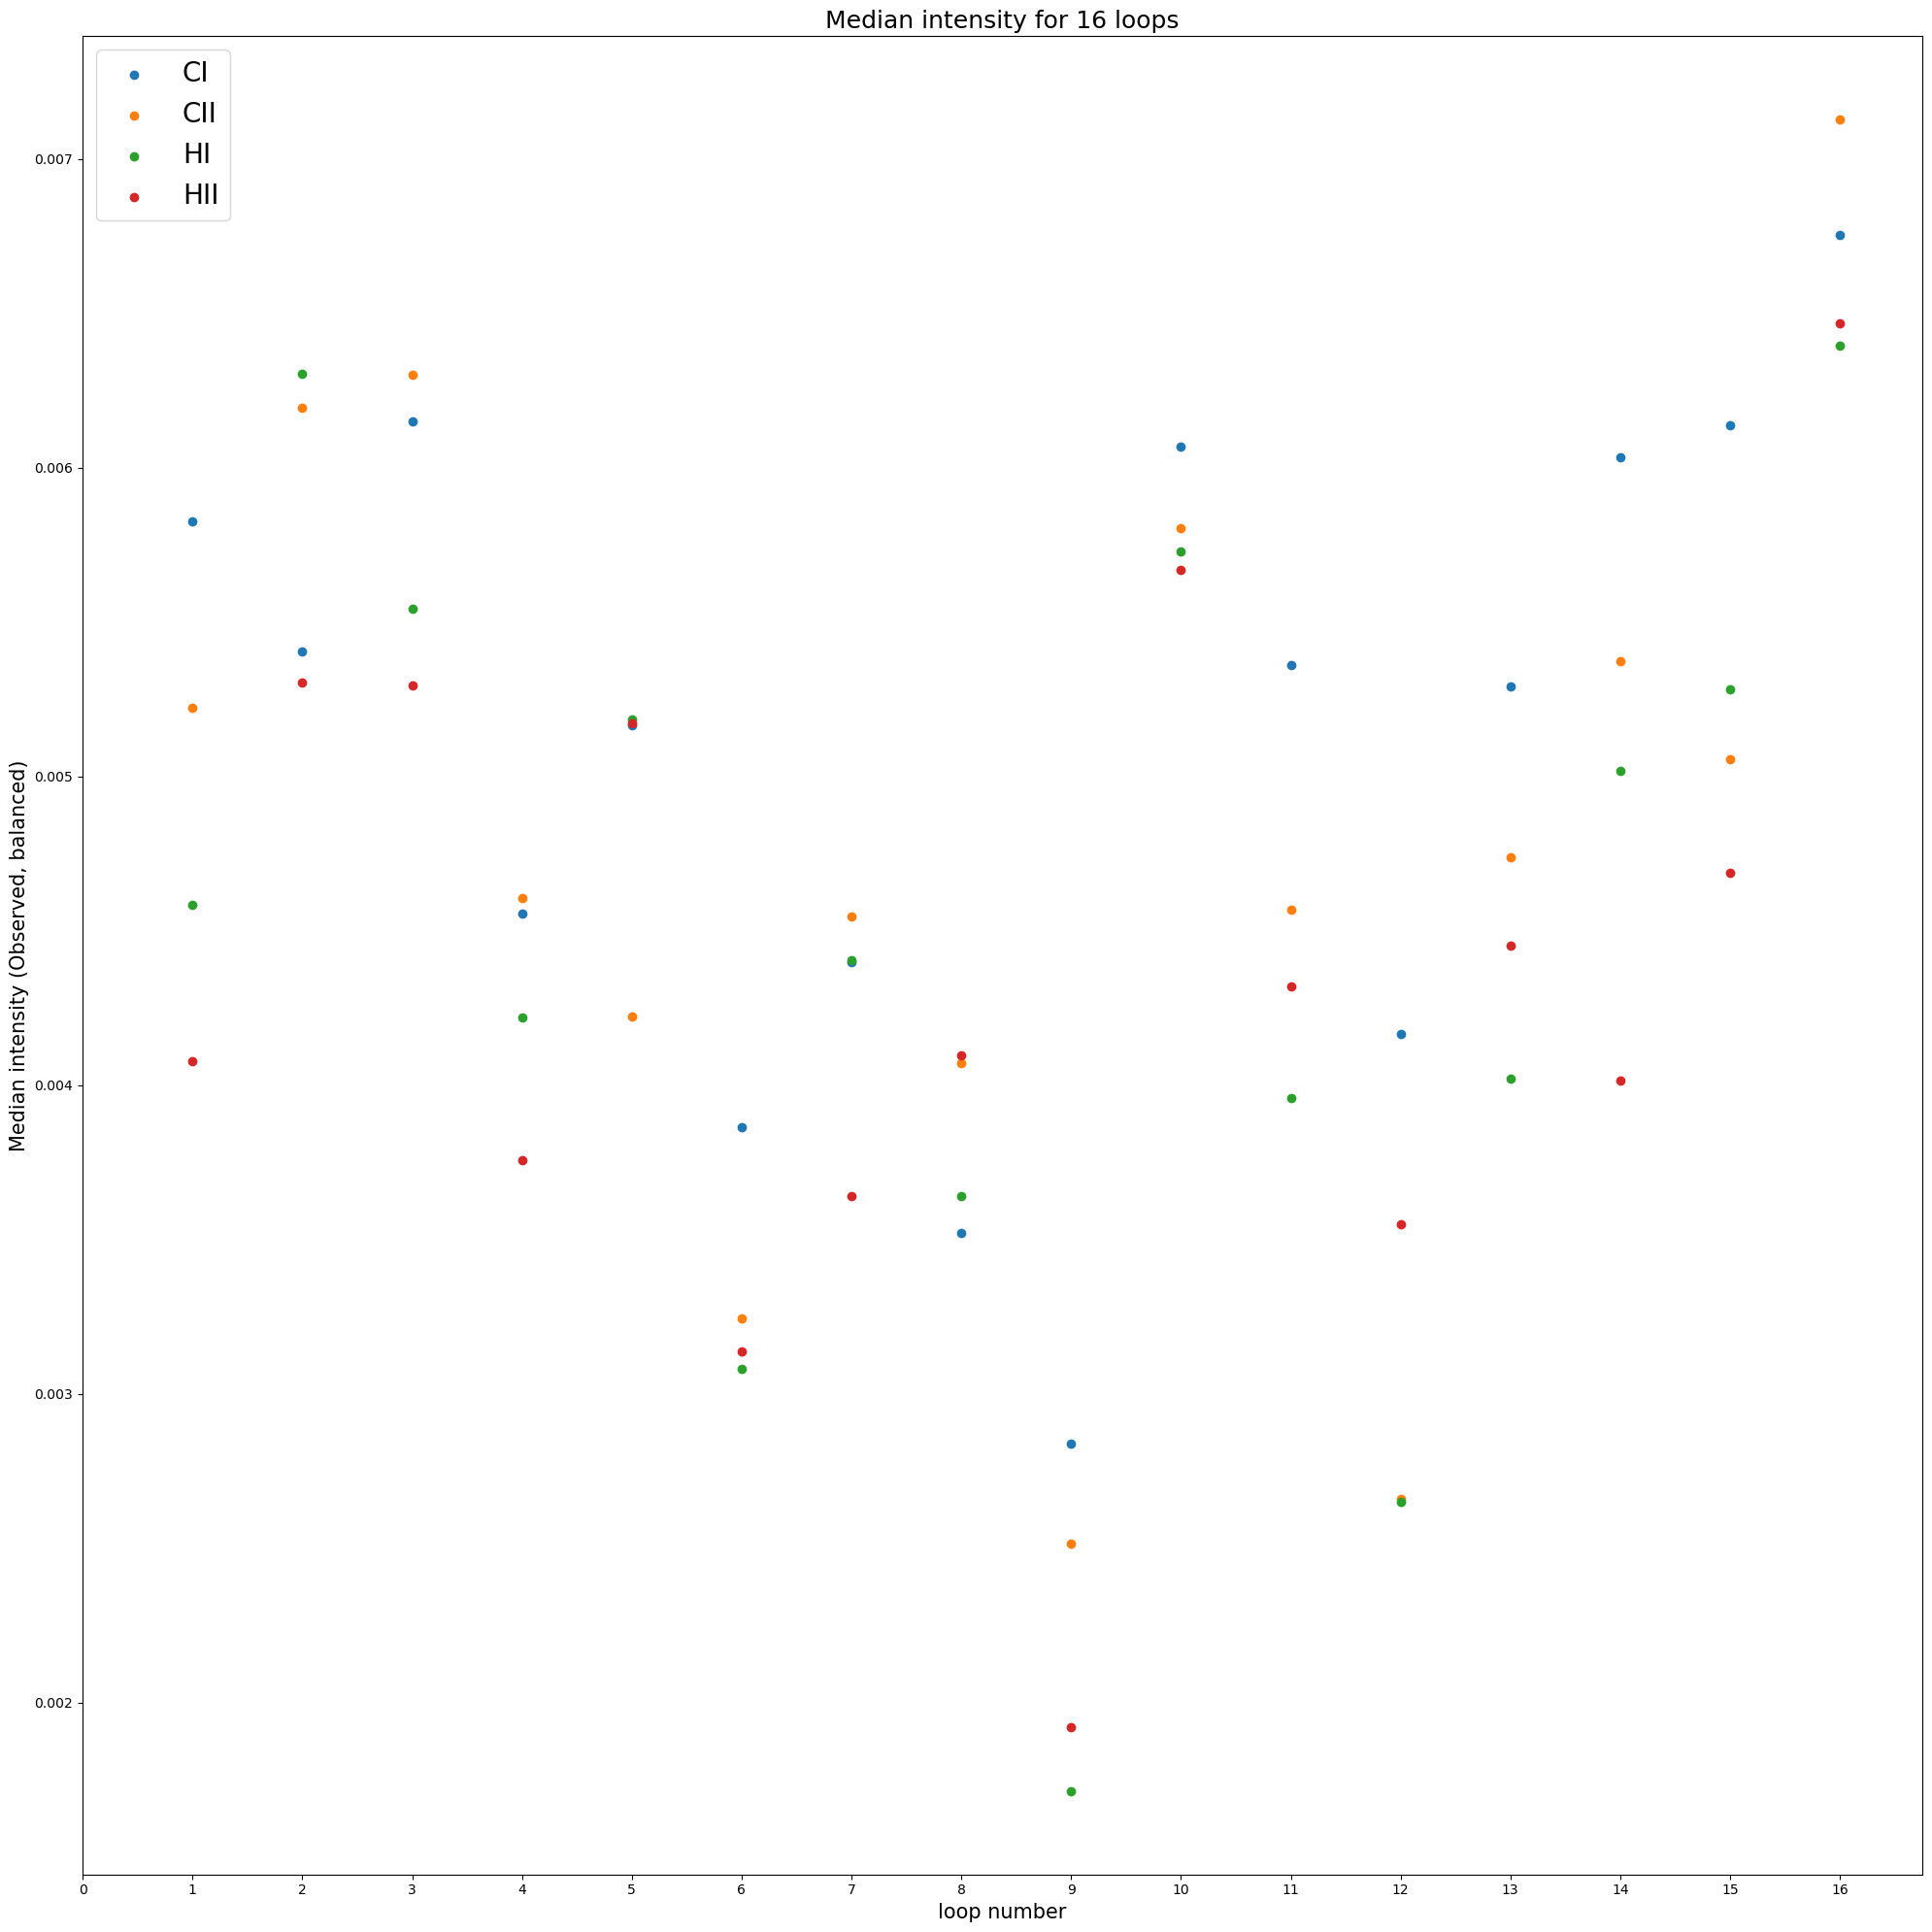

In [520]:
fig, axs = plt.subplots(1, 1, figsize=(20, 20))
l = loop_median_df["loop"].astype(int).values
ds1 = loop_median_df["CI"].values
ds2 = loop_median_df["CII"].values
ds3 = loop_median_df["HI"].values
ds4 = loop_median_df["HII"].values
axs.scatter(l, ds1, label='CI')
axs.scatter(l, ds2, label='CII')
axs.scatter(l, ds3, label='HI')
axs.scatter(l, ds4, label='HII')
plt.xticks(np.arange(0, 17, 1.0))
plt.xlabel('loop number', size=15)
plt.ylabel('Median intensity (Observed, balanced)', size=15)
print("loop7 - LCR1-KRT5, 8 - LCR1-ench, 10 - LCR1-LCR2, 14 - LCR2-KRT5, 15 - LCR2-ench")
plt.title('Median intensity for 16 loops', size=18)


plt.legend(loc='best', prop={'size': 20})
plt.tight_layout()
# plt.savefig('fig.png')

#### Spearman corr

In [451]:
loop_median_df.iloc[:, [1, 2, 3, 4]].corr(method='spearman')

CI       CII        HI       HII
CI   1.000000  0.920588  0.858824  0.773529
CII  0.920588  1.000000  0.894118  0.785294
HI   0.858824  0.894118  1.000000  0.861765
HII  0.773529  0.785294  0.861765  1.000000

#### Wilcoxon (paired)

In [489]:
res_1 = wilcoxon(loop_median_df["CI"], loop_median_df["CII"])
res_2 = wilcoxon(loop_median_df["HI"], loop_median_df["HII"])
res_3 = wilcoxon(loop_median_df["CI"], loop_median_df["HI"])
res_4 = wilcoxon(loop_median_df["CI"], loop_median_df["HII"])
res_5 = wilcoxon(loop_median_df["CII"], loop_median_df["HI"])
res_6 = wilcoxon(loop_median_df["CII"], loop_median_df["HII"])
print("            statistic     pvalue")
print(f"CI & CII:    {res_1.statistic}       {res_1.pvalue}")
print(f"HI & HII:    {res_2.statistic}       {res_2.pvalue}")
print(f"CI & HI:    {res_3.statistic}       {res_3.pvalue}")
print(f"CI & HII:    {res_4.statistic}       {res_4.pvalue}")
print(f"CII & HI:    {res_5.statistic}       {res_5.pvalue}")
print(f"CII & HII:    {res_6.statistic}       {res_6.pvalue}")

            statistic     pvalue
CI & CII:    31.0       0.05767822265625
HI & HII:    50.0       0.375457763671875
CI & HI:    16.0       0.005157470703125
CI & HII:    6.0       0.00042724609375
CII & HI:    25.0       0.02496337890625
CII & HII:    24.0       0.021392822265625


**Wilcoxon медианы C vs. Hex**

In [480]:
median_c = pd.concat([loop_median_df["CI"], loop_median_df["CII"]])
median_h = pd.concat([loop_median_df["HI"], loop_median_df["HII"]])

In [483]:
res = wilcoxon(median_c, median_h)
print("            statistic     pvalue")
print(f"C vs Hex:    {res.statistic}       {res.pvalue}")

            statistic     pvalue
C vs Hex:    74.0       0.0001777801662683487


### Merged

In [541]:
#create df for merged reps
loops_merged_df = pd.DataFrame(columns=['loop', 'C', 'H'])
for i in range(16):
    df_subset = df.loc[df['loop'] == i+1]
    loop_c = pd.concat([df_subset[1], df_subset[2]])
    loop_h = pd.concat([df_subset[3], df_subset[4]])
    loop_df = pd.DataFrame({'loop': i+1, 'C': loop_c, 'H': loop_h})
    loops_merged_df = pd.concat([loops_merged_df, loop_df])

In [550]:
loops_merged_df

loop         C         H
0     1  0.003773  0.002841
1     1  0.000774  0.001893
2     1  0.002098  0.002003
3     1  0.003047  0.003916
4     1  0.008188  0.004336
..  ...       ...       ...
67   16  0.018838  0.006215
68   16  0.006340  0.002597
69   16  0.010155  0.008472
70   16  0.006410  0.003773
71   16  0.006852  0.004623

[1240 rows x 3 columns]

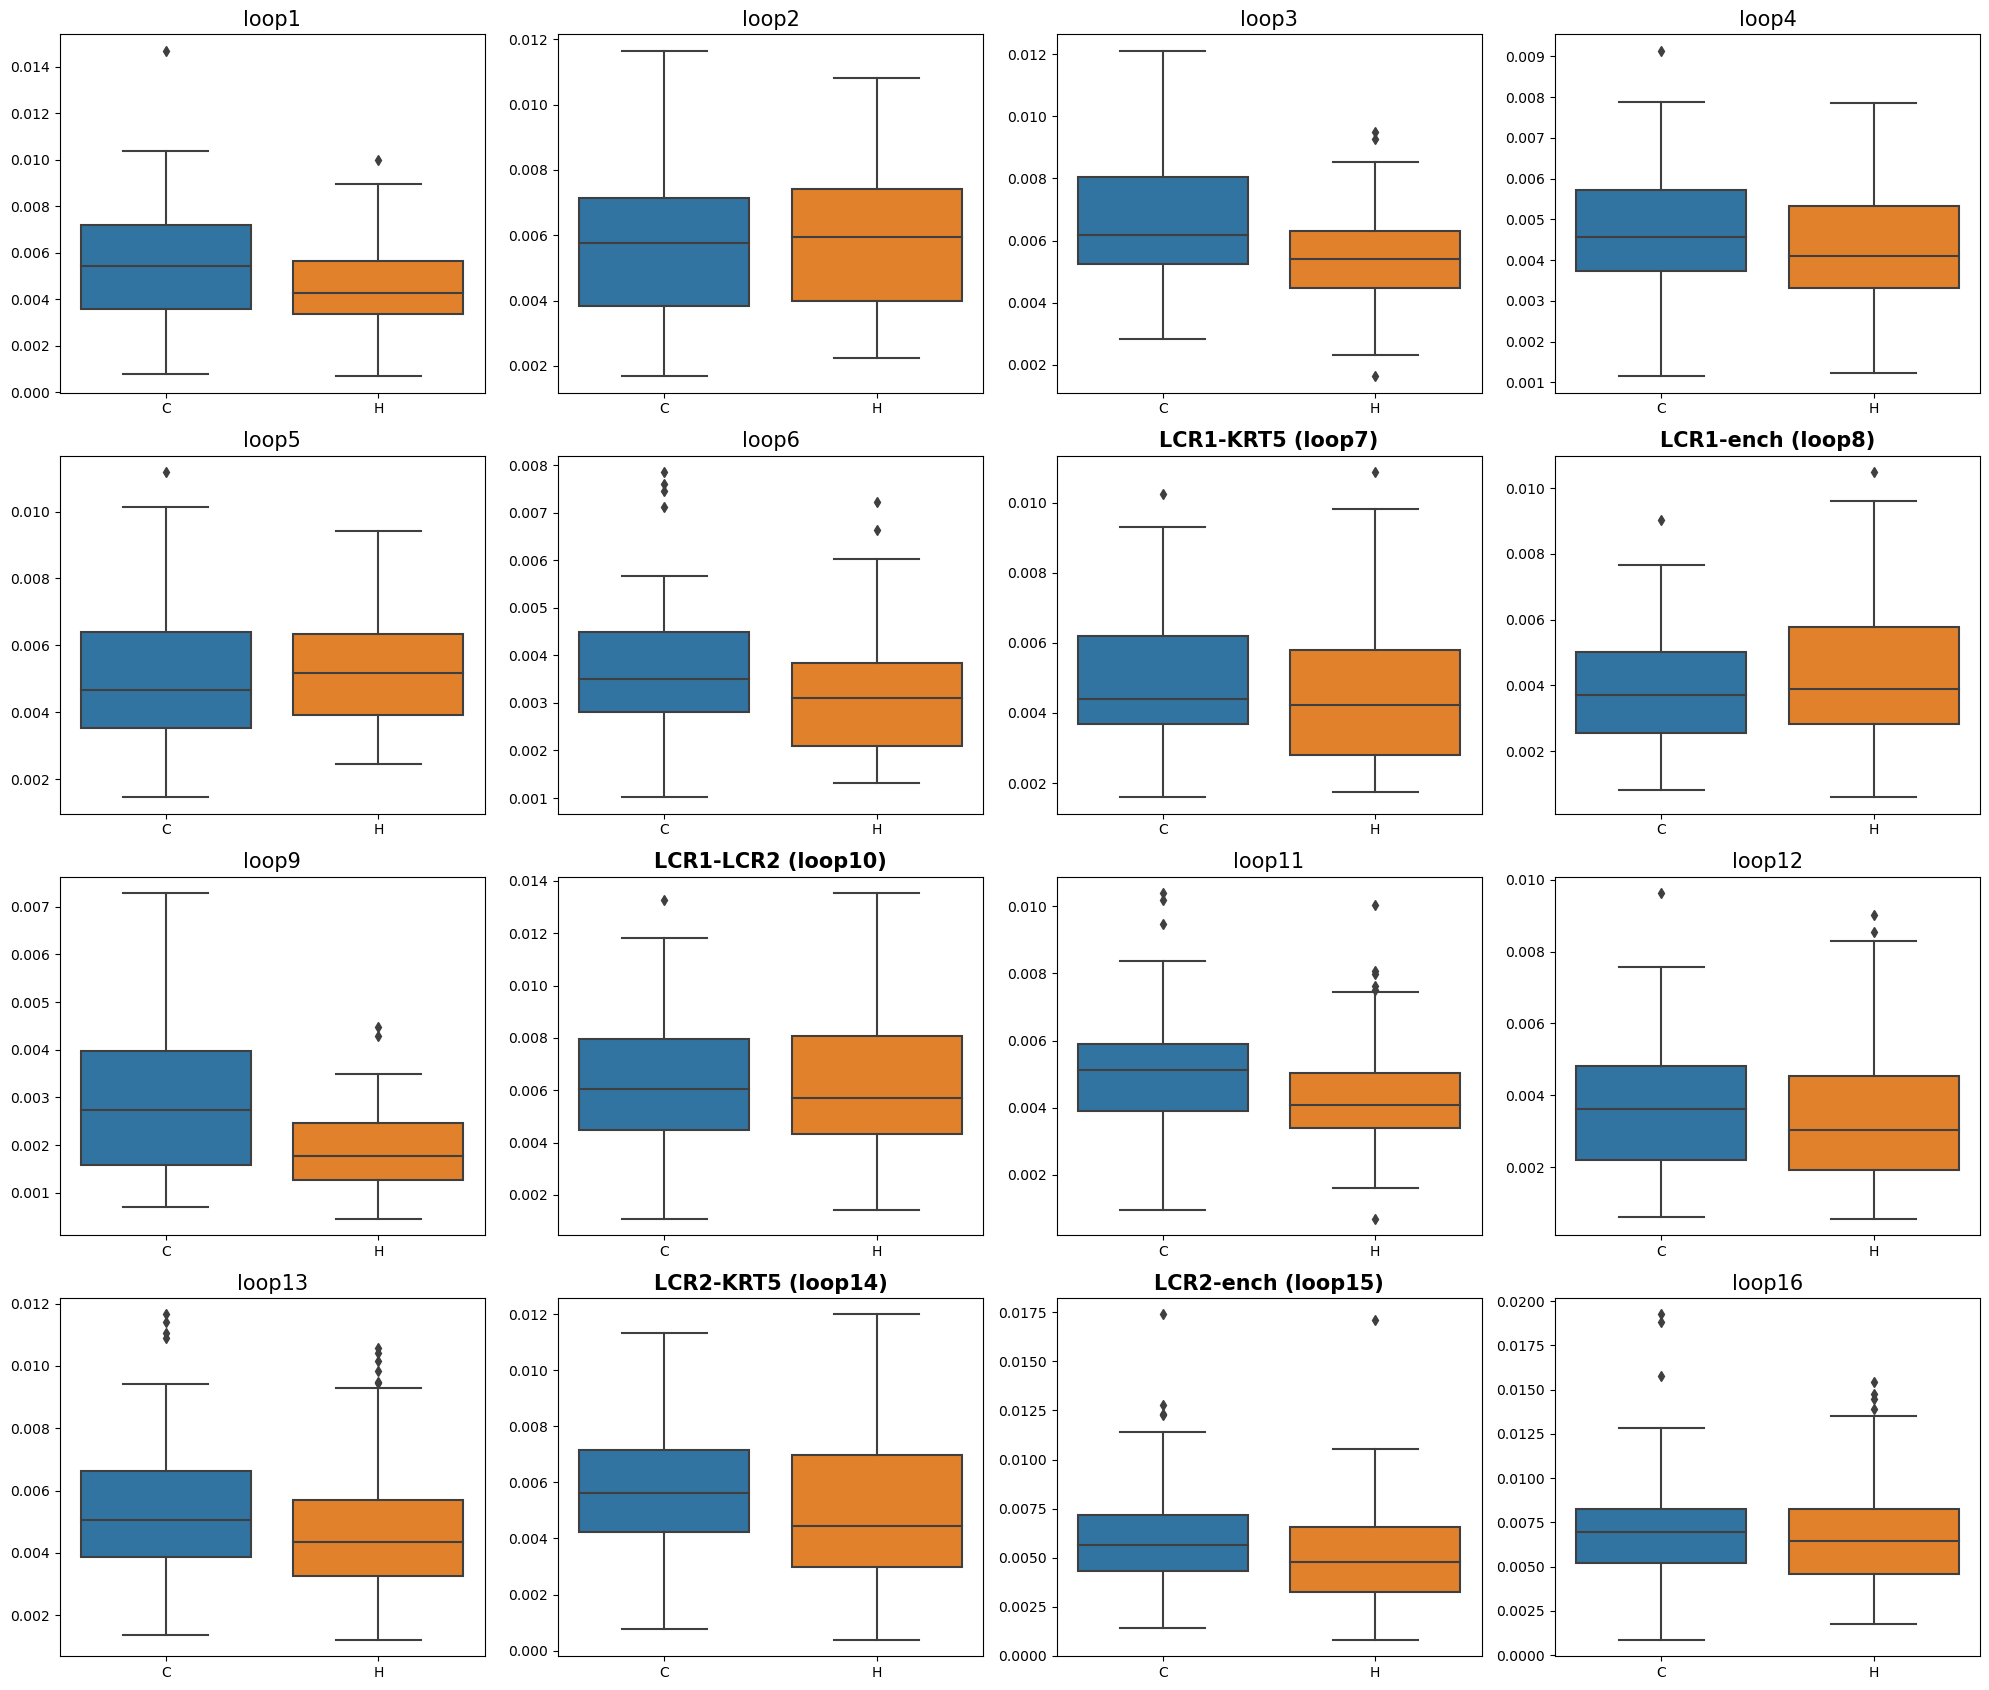

In [554]:
f, axes = plt.subplots(4,4, figsize=(20,17))
for i in range(16):
    
    g = sns.boxplot(data=loops_merged_df.loc[loops_merged_df['loop'] == i+1].iloc[:, [1, 2]], ax=axes[i//4, i%4])
    g.set_xticklabels(['C', 'H']);
    if i==9:
        axes[i//4, i%4].set_title(f'LCR1-LCR2 (loop{i + 1})', size=15, fontweight="bold")
    elif i==6:
        axes[i//4, i%4].set_title(f'LCR1-KRT5 (loop{i + 1})', size=15, fontweight="bold")
    elif i==7:
        axes[i//4, i%4].set_title(f'LCR1-ench (loop{i + 1})', size=15, fontweight="bold")
    elif i==13:
        axes[i//4, i%4].set_title(f'LCR2-KRT5 (loop{i + 1})', size=15, fontweight="bold") 
    elif i==14:
        axes[i//4, i%4].set_title(f'LCR2-ench (loop{i + 1})', size=15, fontweight="bold") 
    else:
        axes[i//4, i%4].set_title(f'loop{i + 1}', size=15)
plt.tight_layout()

**Что говорит Wilcoxon для каждой петли?**

In [601]:
# do wilcoxon for each loop
loop_p_val = pd.DataFrame(columns=['loop','stat', 'p_val'])
for i in range(16):
    subset = loops_merged_df.loc[loops_merged_df['loop'] == i+1]
    res = wilcoxon(subset["C"], subset["H"], nan_policy='omit')
    new_row_df = pd.DataFrame({'loop': i+1, 'stat': res.statistic, 'p_val': res.pvalue}, index=[i])
    loop_p_val = pd.concat([loop_p_val, new_row_df])

In [602]:
loop_p_val

loop    stat     p_val
0     1   583.0  0.014523
1     2   948.0  0.538389
2     3   264.0  0.000643
3     4   805.0  0.016105
4     5  1036.0  0.118748
5     6   620.0  0.029880
6     7   599.0  0.020004
7     8   865.0  0.434371
8     9   183.0  0.000081
9    10  2361.0  0.690709
10   11  1873.0  0.000178
11   12   567.0  0.266549
12   13  1616.0  0.020084
13   14  1443.0  0.022074
14   15  1480.0  0.127843
15   16  4403.0  0.170207

In [616]:
sign_loops = loop_p_val.query("p_val < 0.05").loop.tolist()
print("According to Wilc, C and Hex are different for loops:")
print(*sign_loops, sep=", ")

C and Hex are different for loops:
1, 3, 4, 6, 7, 9, 11, 13, 14


### C and Hex are different for loops:
### 1, 3, 4, 6, 7, 9, 11, 13, 14

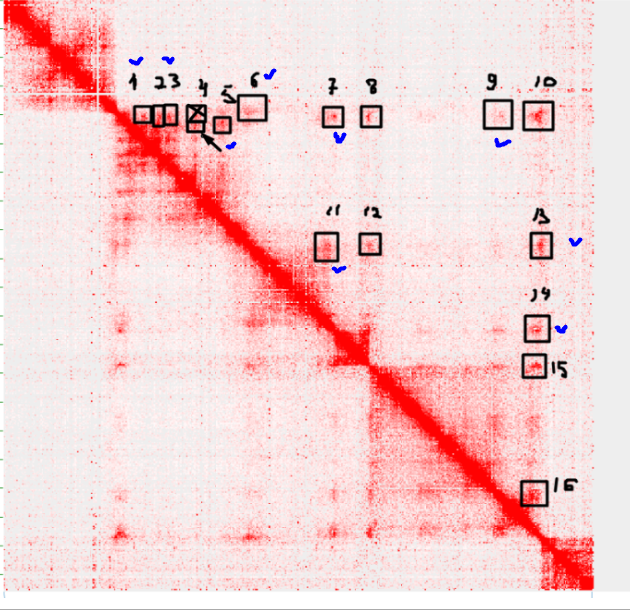

### Ctrl 1
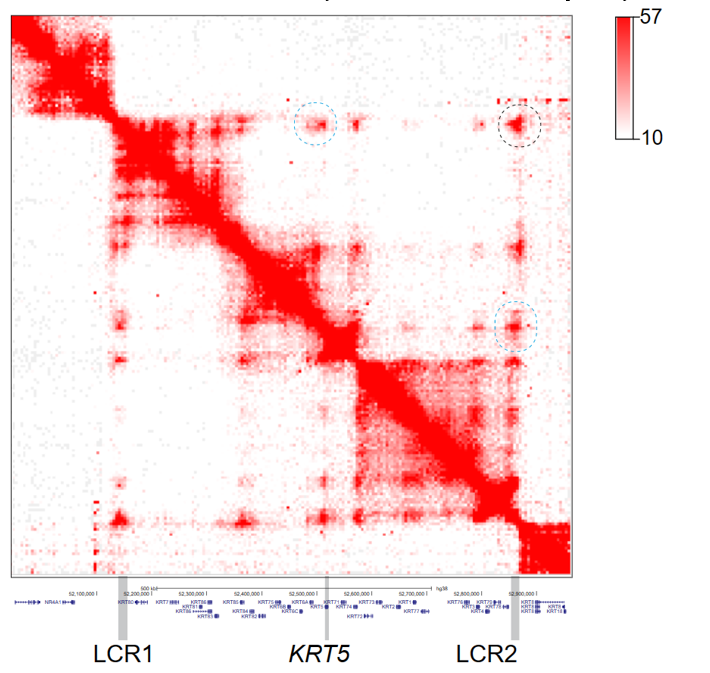

### Hex 1 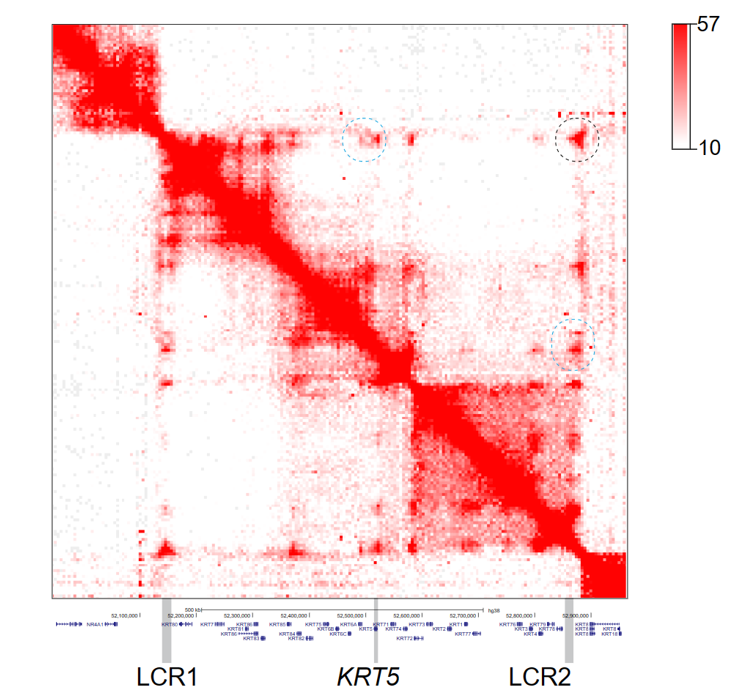

### Ctrl 2 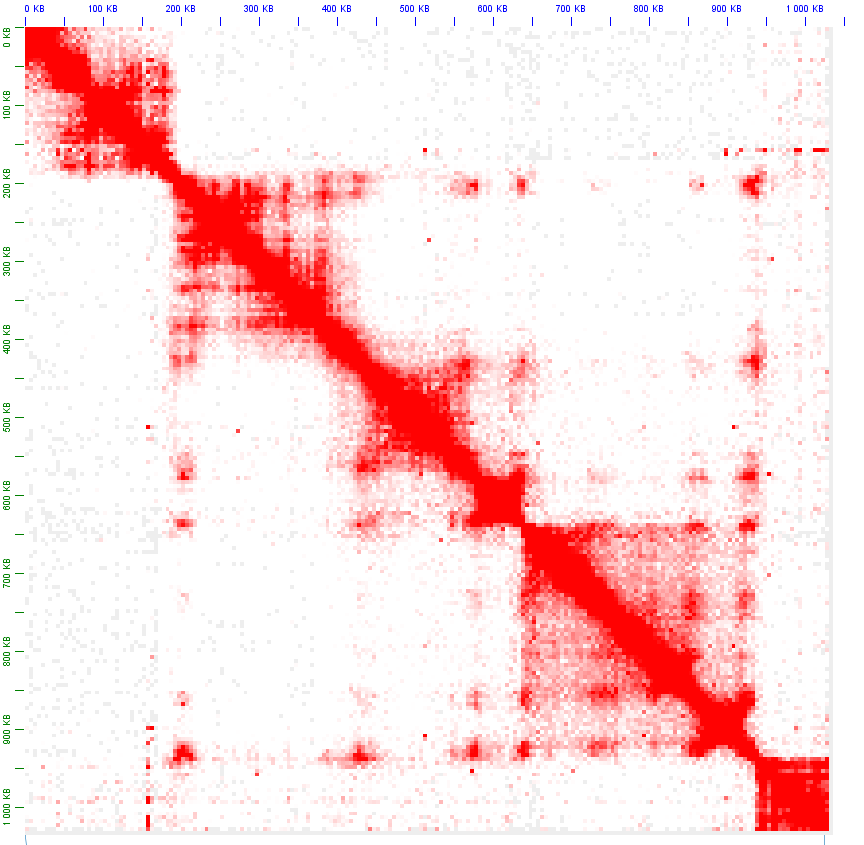

### HEx2 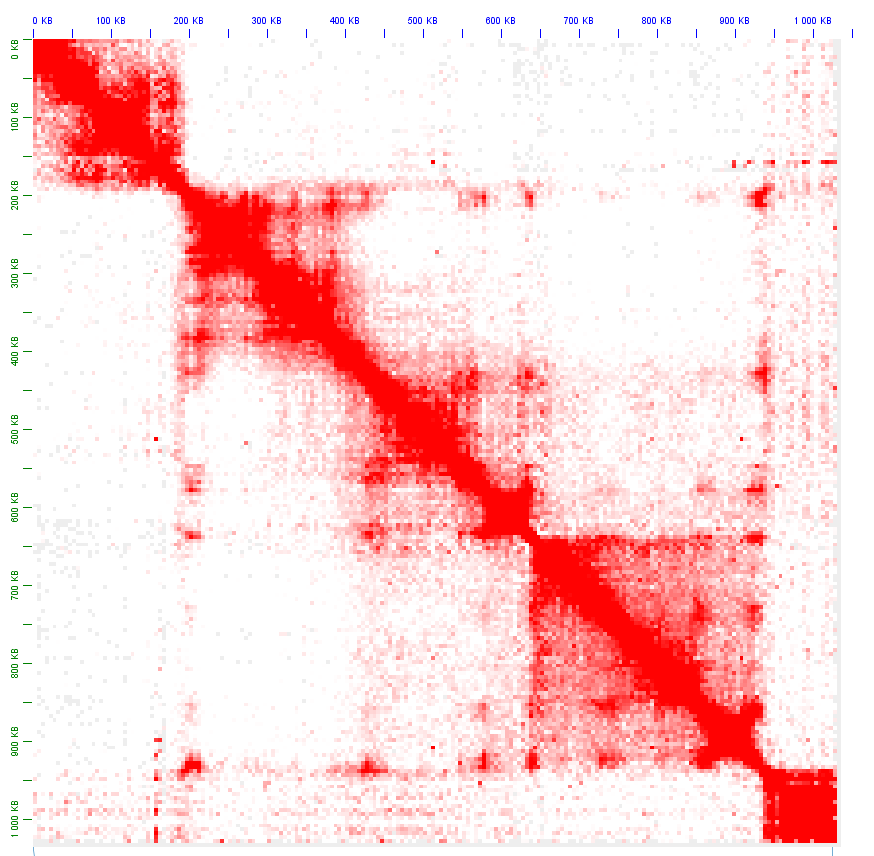

#### Может, парный t-test будет помягче

In [737]:
#логарифмируем значения
loops_merged_df_log = loops_merged_df.apply(lambda x: np.log10(x) if (x.name == 'H' or x.name == 'C') else x)
loops_merged_df_log.head()

loop         C         H
0    1 -2.423313 -2.546487
1    1 -3.111453 -2.722754
2    1 -2.678156 -2.698407
3    1 -2.516109 -2.407118
4    1 -2.086839 -2.362876

In [635]:
# ttest for each loop
ttest_p_val = pd.DataFrame(columns=['loop','stat', 'p_val'])
for i in range(16):
    subset = loops_merged_df_log.loc[loops_merged_df_log['loop'] == i+1]
    res = ttest_rel(subset["C"], subset["H"], nan_policy='omit')
    new_row_df = pd.DataFrame({'loop': i+1, 'stat': res.statistic, 'p_val': res.pvalue}, index=[i])
    ttest_p_val = pd.concat([ttest_p_val, new_row_df])

In [736]:
ttest_p_val.head()

loop      stat     p_val
0    1  2.522716  0.014362
1    2 -0.594265  0.554463
2    3  3.594619  0.000776
3    4  2.344253  0.021994
4    5 -1.925900  0.058121

In [637]:
sign_loops = loop_p_val.query("p_val < 0.05").loop.tolist()
print("According to ttest, C and Hex are different for loops:")
print(*sign_loops, sep=", ")

According to ttest, C and Hex are different for loops:
1, 3, 4, 6, 9, 11, 14, 15


**Но: распределение не нормальное**

**Так что не берем**

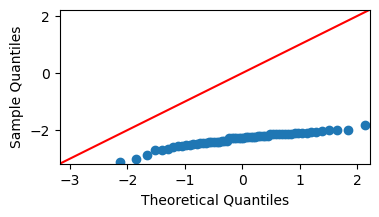

In [648]:
data_points = loops_merged_df_log.query("loop == 1").C
sm.qqplot(data_points, line ='45')
py.show()

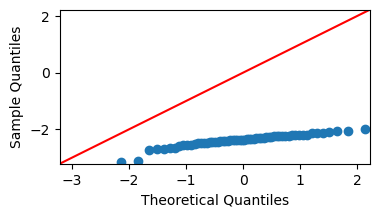

In [640]:
data_points = loops_merged_df_log.query("loop == 1").H
sm.qqplot(data_points, line ='45')
py.show()

# Recruitment

In [738]:
dirpath = "/tank/projects/mm_keratin_ctale/recruitment/results_fin/2kb/not_downs/"
files = ["KLF", "dCas", "mock", "mix"]
for file in files:
    c = cooler.Cooler(dirpath+file+"_2000hg38.cool")
    print(file, c.info["sum"], "\n")

KLF 260998 

dCas 339656 

mock 276866 

mix 781305 



In [633]:
res = ttest_rel(subset["C"], subset["H"], nan_policy='omit')
res.statistic

2.073488098790404

In [566]:
subset = loops_merged_df.loc[loops_merged_df['loop'] == 1]
res = wilcoxon(subset["C"], subset["H"])
pd.DataFrame(pd.Series([res.statistic, res.pvalue]).values).transpose()
# pd.DataFrame(series_1d.values.tolist())

0         1
0  583.0  0.014523

In [ ]:
def wilcoxon_for_loop(ensemble, X):
    corrs = []
    base_model_names = [f"{est.__class__.__name__}" for est in ensemble.estimators_]
    for (i, est1), (j, est2) in combinations(enumerate(ensemble.estimators_), 2):
res_6 = wilcoxon(loop_median_df["CII"], loop_median_df["HII"])
        corrs.append((id(est1), id(est2), pearsonr(ypred_t1, ypred_t2)[0]))


    return corrs

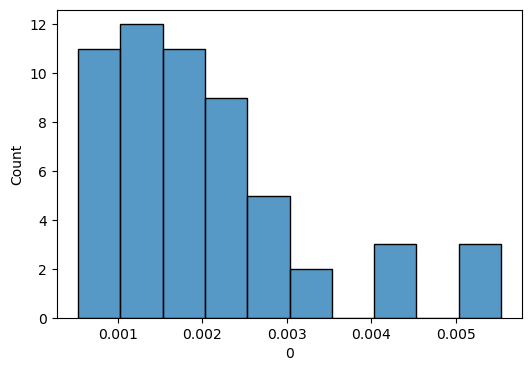

In [111]:
sns.histplot(lcrnn[0], binwidth=0.0005);

<Axes: >

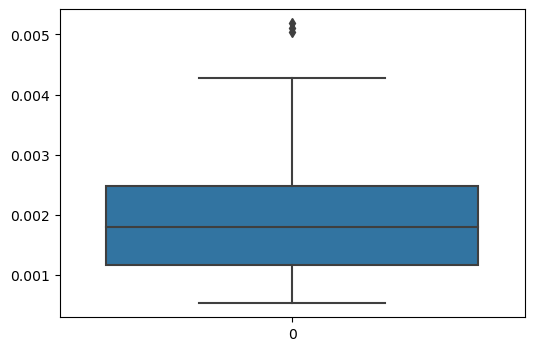

In [113]:
sns.boxplot(data=lcrnn.loc[:, 0])

/tmp/ipykernel_48029/4292348178.py:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(arr), cmap='YlOrRd')


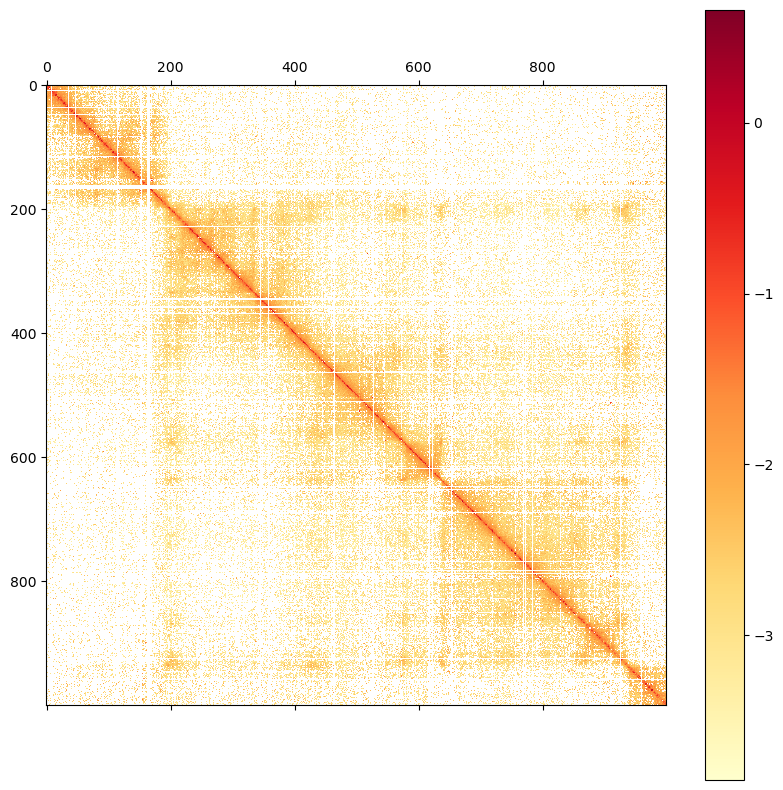

In [65]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)
# im = ax.matshow(np.log10(arr), cmap='YlOrRd')
# fig.colorbar(im)

In [69]:
# np.nansum(arr2, axis=1, )

array([1.63747754, 2.08922706, 1.57373098, 1.65242149, 1.64353002,
       1.34246266, 1.74139974, 1.57129351, 0.        , 0.        ,
       1.54425745, 1.4624036 , 1.33699415, 1.5007665 , 1.56036013,
       1.97507673, 2.00625937, 1.36832082, 1.57150568, 1.60215509,
       1.65255878, 1.24897995, 1.71197095, 1.77382977, 1.38550362,
       1.37056956, 1.35780237, 1.44974097, 1.58890372, 2.17114506,
       1.79228923, 1.49776208, 1.23813468, 1.12995418, 2.16035908,
       2.03557013, 0.        , 1.23954013, 1.56052111, 2.55488883,
       2.54570806, 1.73431628, 1.48022184, 1.57523048, 1.29369284,
       1.83169887, 1.30266056, 0.        , 1.31984821, 1.74671521,
       1.62674109, 1.4604278 , 1.33187685, 1.83535931, 3.24025773,
       2.8779028 , 1.24202802, 1.35182345, 1.62753318, 1.50662037,
       1.5873048 , 1.6756414 , 1.81604716, 1.82533842, 1.32827226,
       1.41297648, 1.18146612, 1.14388517, 1.57976393, 1.53532778,
       2.44606662, 1.73410229, 1.38042165, 1.60991165, 1.53336

In [71]:
# arr3 = c.matrix(balance=True, sparse=True)[:, :].toarray()

In [73]:
# np.nansum(arr3, axis=1)

array([1.67716757, 2.10845641, 1.58644396, ..., 2.24968823, 1.92917181,
       0.        ])

## Merge replicates. SCC

In [6]:
from hicrep.utils import readMcool
from hicrep import hicrepSCC

Допустим, ctrl1 и hex2 

и hex1, ctrl2

In [ ]:
# dCas_ds_1000hg38.cool  KLF_1000hg38.cool  mix_ds_1000hg38.cool  mock_ds_1000hg38.cool
# /tank/projects/mm_keratin_ctale/recruitment/results_fin/downs/cool


In [ ]:
# II-CTRL_reg12_1000hg38.hic
# subs_I-CTRL_reg12_1000hg38.hic
# subs_I-HEX_reg12_1000hg38.hic
# subs_II-HEX_reg12_1000hg38.hic

In [14]:
path_to_dir="/tank/projects/mm_keratin_ctale/c_tale_hacat/results_Masha_CTRL_HEX/Masha_CTRL_HEX_ds_res/"
fcool1 = path_to_dir+"subs_I-CTRL_reg12_1000hg38.cool"
fcool2 = path_to_dir+"subs_II-HEX_reg12_1000hg38.cool"
fcool3 = path_to_dir+"subs_I-HEX_reg12_1000hg38.cool"
fcool4 = path_to_dir+"II-CTRL_reg12_1000hg38.cool"
cool1, binSize1 = readMcool(fcool1, -1)
cool2, binSize2 = readMcool(fcool2, -1)
cool3, binSize2 = readMcool(fcool3, -1)
cool4, binSize2 = readMcool(fcool4, -1)
# binSize1 and binSize2 will be set to the bin size built in the cool file
binSize = binSize1

In [30]:
# smoothing window half-size
h = 1

# maximal genomic distance to include in the calculation
# dBPMax = 500000
dBPMax = 100000
# whether to perform down-sampling or not 
# if set True, it will bootstrap the data set # with larger contact counts to
# the same number of contacts as in the other data set; otherwise, the contact 
# matrices will be normalized by the respective total number of contacts
bDownSample = False

# compute the SCC score
# this will result in a SCC score for each chromosome available in the data set
# listed in the same order as the chromosomes are listed in the input Cooler files
scc1 = hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)  #1ctrl 2hex
scc2 = hicrepSCC(cool3, cool4, h, dBPMax, bDownSample)   #2ctrl 1hex
scc3 = hicrepSCC(cool1, cool4, h, dBPMax, bDownSample)  #1ctrl 2ctrl
scc4 = hicrepSCC(cool2, cool3, h, dBPMax, bDownSample)   #1hex 2hex

In [31]:
print(scc1, scc2, scc3, scc4)

[0.84981504] [0.84888266] [0.87399464] [0.8705815]
